In [2]:
import os
import torch
import numpy as  np


from pprint import pprint, pformat
import logging

import importlib as IM

In [4]:
import tace16 
IM.reload(tace16)

['அ', 'X', '0xE201', '0xe0', '0xae', '0x85', '', '', '', '0']
['ஆ', 'X', '0xE202', '0xe0', '0xae', '0x86', '', '', '', '0']
['இ', 'X', '0xE203', '0xe0', '0xae', '0x87', '', '', '', '0']
['ஈ', 'X', '0xE204', '0xe0', '0xae', '0x88', '', '', '', '0']
['உ', 'X', '0xE205', '0xe0', '0xae', '0x89', '', '', '', '0']
['ஊ', 'X', '0xE206', '0xe0', '0xae', '0x8a', '', '', '', '0']
['எ', 'X', '0xE207', '0xe0', '0xae', '0x8e', '', '', '', '0']
['ஏ', 'X', '0xE208', '0xe0', '0xae', '0x8f', '', '', '', '0']
['ஐ', 'X', '0xE209', '0xe0', '0xae', '0x90', '', '', '', '0']
['ஒ', 'X', '0xE20A', '0xe0', '0xae', '0x92', '', '', '', '9']
['ஓ', 'X', '0xE20B', '0xe0', '0xae', '0x93', '', '', '', '0']
['ஔ', 'X', '0xE20C', '0xe0', '0xae', '0x94', '', '', '', '0']
['ஃ', 'X', '0xE20D', '0xe0', '0xae', '0x83', '', '', '', '0']
['க்', 'X', '0xE210', '0xe0', '0xae', '0x95', '0xe0', '0xaf', '0x8d', '-1']
{(224, 175, 141): -1}
['க', 'X', '0xE211', '0xe0', '0xae', '0x95', '', '', '', '0']
['கா', 'X', '0xE212', '0xe0', '0xa

<module 'tace16' from '/home/paarulakan/projects/tamil_name_gen/tace16.py'>

In [5]:
58244 in tace16.conversion_map

False

In [6]:
logging.basicConfig(format='%(levelname)s - %(message)s')
log = logging.getLogger('root')
log.setLevel(logging.INFO)

In [7]:
log.info('vjnsegn')

INFO    :<ipython-input-7-c318d9e9d25c>.            <module> >>   vjnsegn


In [8]:
def read_data(filename='names.csv'):
    data = open(filename).readlines()
    samples = []
    for datum in data:
        samples.append(datum.split(',')[1])
        
    return samples

In [9]:
def read_dirs(dirs=['boy', 'girl']):
    samples = []
    for d in dirs:
        for filename in os.listdir('data/tamil-names/{}'.format(d)):
            s = read_data('data/tamil-names/{}/{}'.format(d, filename))
            s = [(d, n) for n in s]
            samples.extend(s)
            
    return list(set(samples))

In [11]:
samples = read_dirs()
print(samples[:10])
_samples = []
for cat, name in samples:
    try:
        _samples.append((cat, tace16.utf8_to_tace16(name)))
    except:
        pass
    
samples = sorted(_samples, key=lambda x: len(x[1]))
categories = ['PAD', 'boy', 'girl']
letters = [c for cat, name in samples for c in name]
letters = list(set(letters))

letters = ['PAD', ' '] + letters + ['EOS']
letters, len(letters)

[('girl', 'சொற்சிலம்பு'), ('girl', 'பனையுரு'), ('boy', 'புரட்சித்தோன்றல்'), ('boy', 'காட்டுவளத்தன்'), ('girl', 'ஆடலமுதம்'), ('girl', 'நகைநிலா'), ('boy', 'சாரன்மல்லன்'), ('boy', 'காஞ்சிமைந்தன்'), ('boy', 'ஈகைமுறையோன்'), ('girl', 'தழலுரு')]


(['PAD',
  ' ',
  57857,
  57858,
  57859,
  57860,
  57861,
  57862,
  57863,
  57864,
  57865,
  57866,
  57867,
  57869,
  57872,
  57873,
  57874,
  57875,
  57876,
  57877,
  57878,
  57879,
  57880,
  57881,
  57882,
  57883,
  57888,
  57889,
  57904,
  57905,
  57906,
  57907,
  57908,
  57909,
  57910,
  57911,
  57912,
  57913,
  57914,
  57915,
  57920,
  57921,
  57922,
  57929,
  57936,
  57937,
  57938,
  57939,
  57941,
  57942,
  57943,
  57944,
  57945,
  57946,
  57947,
  57952,
  57953,
  57954,
  57955,
  57956,
  57957,
  57958,
  57959,
  57960,
  57961,
  57962,
  57963,
  57968,
  57969,
  57970,
  57971,
  57972,
  57973,
  57974,
  57975,
  57976,
  57977,
  57978,
  57979,
  57980,
  57984,
  57985,
  57986,
  57987,
  57988,
  57989,
  57991,
  57992,
  57993,
  57994,
  58000,
  58001,
  58002,
  58003,
  58004,
  58005,
  58006,
  58007,
  58008,
  58009,
  58010,
  58011,
  58016,
  58017,
  58018,
  58019,
  58020,
  58021,
  58022,
  58023,
  58024,
  5

In [44]:
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
class Generator(nn.Module):
    def __init__(self, category_size, input_size, hidden_size, output_size, randomize_size=5):
        super(Generator, self).__init__()
        self.category_size = category_size
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.randomize_size = randomize_size
        self.cat_embedding = nn.Embedding(category_size, hidden_size)
        self.inp_embedding = nn.Embedding(input_size, hidden_size)
        self.blend = nn.Linear(2*hidden_size + randomize_size, hidden_size)
        self.gru = nn.GRUCell(hidden_size, hidden_size)
        self.project = nn.Linear(hidden_size, output_size)
        
    def forward(self, cat, char, hidden, random):
        log.debug('cat: {}, char: {}'.format(cat.size(), char.size()))
        cat = self.cat_embedding(cat)
        char = self.inp_embedding(char)
        log.debug('cat: {}, char: {}'.format(cat.size(), char.size()))
        log.debug('random: {}'.format(random.size()))
        merged = torch.cat([cat, char, random], cat.dim()-1)
        log.debug('cat: {}, char: {}, merged: {}'.format(cat.size(), char.size(), merged.size()))
        blended = self.blend(merged)
        log.debug('blended: {}'.format(blended.size()))
        log.debug('hidden: {}'.format(hidden.size()))
        hidden = self.gru(blended, hidden)
        log.debug('hidden: {}'.format(hidden.size()))
        return hidden, F.log_softmax(self.project(hidden))
    
    def randomize(self, batch_size=1):
        return Variable(torch.randn(batch_size, self.randomize_size))
        
    def init_hidden(self, batch_size=1):
        return Variable(torch.zeros(batch_size, self.hidden_size))
        

In [68]:
gen = Generator(len(categories), len(letters), 50, len(letters)).cuda()

In [69]:
log.setLevel(logging.DEBUG)

In [70]:
gen(Variable(torch.LongTensor([1,0,1])).cuda(), 
    Variable(torch.LongTensor([1, 2, 3])).cuda(), 
    gen.init_hidden(3).cuda(),
    gen.randomize(3).cuda())

DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   cat: torch.Size([3]), char: torch.Size([3])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   cat: torch.Size([3, 50]), char: torch.Size([3, 50])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   random: torch.Size([3, 5])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   cat: torch.Size([3, 50]), char: torch.Size([3, 50]), merged: torch.Size([3, 105])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   blended: torch.Size([3, 50])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   hidden: torch.Size([3, 50])
DEBUG   :<ipython-input-44-4b2d464a7b37>.             forward >>   hidden: torch.Size([3, 50])


(Variable containing:
 
 Columns 0 to 9 
  0.0557  0.0123 -0.1782 -0.2266 -0.0988 -0.0597  0.1637 -0.2019  0.1215  0.3664
  0.0804 -0.0339 -0.1947  0.0940  0.1677  0.1282 -0.1854 -0.3742  0.2785  0.2326
  0.0693 -0.2605 -0.0690 -0.0691 -0.1281 -0.1382  0.0280 -0.0625  0.0573  0.2836
 
 Columns 10 to 19 
  0.1092 -0.0279  0.1267  0.0950 -0.1125  0.0867  0.0797  0.0207  0.0729 -0.1738
 -0.1937  0.1826 -0.0369  0.1928  0.1646 -0.0739 -0.1432  0.0352  0.2550  0.0549
 -0.0683  0.0084  0.1051  0.1211 -0.0321  0.1876  0.1592 -0.1000 -0.0121 -0.2731
 
 Columns 20 to 29 
  0.0193 -0.1234  0.0862 -0.0814 -0.1163  0.2577 -0.0943  0.0293 -0.1654  0.1761
  0.0893 -0.1595 -0.0495  0.1358 -0.0558  0.0408  0.0281 -0.0656  0.0682  0.2328
 -0.0047 -0.0192  0.0915  0.0167 -0.0684  0.0698 -0.0447  0.0202 -0.1745  0.3142
 
 Columns 30 to 39 
  0.0256 -0.1870  0.0698 -0.0674  0.2401 -0.0470  0.1499  0.0779 -0.0056 -0.2011
  0.0422 -0.0641 -0.1185  0.2363 -0.0777 -0.0200  0.1424 -0.0865  0.3087 -0.0208
 -0.0

In [16]:
tace16.tace16_to_utf8(letters[2:-1])

[224,
 174,
 133,
 224,
 174,
 134,
 224,
 174,
 135,
 224,
 174,
 136,
 224,
 174,
 137,
 224,
 174,
 138,
 224,
 174,
 142,
 224,
 174,
 143,
 224,
 174,
 144,
 224,
 174,
 146,
 224,
 174,
 147,
 224,
 174,
 131,
 224,
 174,
 149,
 224,
 175,
 141,
 224,
 174,
 149,
 224,
 174,
 149,
 224,
 174,
 190,
 224,
 174,
 149,
 224,
 174,
 191,
 224,
 174,
 149,
 224,
 175,
 128,
 224,
 174,
 149,
 224,
 175,
 129,
 224,
 174,
 149,
 224,
 175,
 130,
 224,
 174,
 149,
 224,
 175,
 134,
 224,
 174,
 149,
 224,
 175,
 135,
 224,
 174,
 149,
 224,
 175,
 136,
 224,
 174,
 149,
 224,
 175,
 138,
 224,
 174,
 149,
 224,
 175,
 139,
 224,
 174,
 153,
 224,
 175,
 141,
 224,
 174,
 153,
 224,
 174,
 154,
 224,
 175,
 141,
 224,
 174,
 154,
 224,
 174,
 154,
 224,
 174,
 190,
 224,
 174,
 154,
 224,
 174,
 191,
 224,
 174,
 154,
 224,
 175,
 128,
 224,
 174,
 154,
 224,
 175,
 129,
 224,
 174,
 154,
 224,
 175,
 130,
 224,
 174,
 154,
 224,
 175,
 134,
 224,
 174,
 154,
 224,
 175,
 135,
 224,
 174

In [17]:
def gen_sample(sample):
    cat, name = sample
    sample = []
    cat = categories.index(cat)
    for char in name:
        cid = letters.index(char)
        sample.append((cat, cid))
    sample.append((cat, len(letters)-1))
    return sample

In [18]:
[gen_sample(sample) for sample in samples[10000:10200]]

[[(2, 101), (2, 127), (2, 150), (2, 138), (2, 141), (2, 208)],
 [(1, 8), (1, 165), (1, 184), (1, 16), (1, 130), (1, 208)],
 [(2, 150), (2, 174), (2, 150), (2, 128), (2, 55), (2, 208)],
 [(1, 20), (1, 67), (1, 72), (1, 103), (1, 58), (1, 208)],
 [(2, 83), (2, 146), (2, 81), (2, 26), (2, 23), (2, 208)],
 [(2, 95), (2, 15), (2, 163), (2, 195), (2, 95), (2, 208)],
 [(2, 39), (2, 146), (2, 83), (2, 139), (2, 154), (2, 208)],
 [(2, 16), (2, 150), (2, 139), (2, 128), (2, 31), (2, 208)],
 [(2, 8), (2, 187), (2, 15), (2, 70), (2, 127), (2, 208)],
 [(1, 2), (1, 195), (1, 95), (1, 103), (1, 146), (1, 208)],
 [(2, 103), (2, 192), (2, 28), (2, 38), (2, 138), (2, 208)],
 [(2, 81), (2, 23), (2, 81), (2, 26), (2, 23), (2, 208)],
 [(2, 30), (2, 128), (2, 184), (2, 33), (2, 204), (2, 208)],
 [(1, 5), (1, 23), (1, 83), (1, 139), (1, 154), (1, 208)],
 [(2, 103), (2, 131), (2, 68), (2, 103), (2, 135), (2, 208)],
 [(1, 2), (1, 111), (1, 69), (1, 137), (1, 195), (1, 208)],
 [(2, 24), (2, 52), (2, 116), (2, 1

In [19]:
sample_ids = []
for sample in samples:
    try:
        s = gen_sample(sample)
        sample_ids.append(s)
    except:
        pass
print(len(samples), len(sample_ids))
sample_ids[:100]

42563 42563


[[(1, 23), (1, 208)],
 [(2, 71), (2, 208)],
 [(2, 36), (2, 208)],
 [(2, 92), (2, 208)],
 [(2, 99), (2, 208)],
 [(1, 16), (1, 208)],
 [(2, 111), (2, 208)],
 [(2, 25), (2, 208)],
 [(1, 92), (1, 208)],
 [(1, 82), (1, 208)],
 [(2, 108), (2, 208)],
 [(1, 96), (1, 208)],
 [(2, 82), (2, 208)],
 [(1, 99), (1, 208)],
 [(2, 23), (2, 208)],
 [(2, 16), (2, 208)],
 [(1, 104), (1, 208)],
 [(1, 71), (1, 208)],
 [(2, 30), (2, 208)],
 [(1, 25), (1, 208)],
 [(1, 30), (1, 208)],
 [(1, 111), (1, 208)],
 [(1, 77), (1, 52), (1, 208)],
 [(1, 91), (1, 58), (1, 208)],
 [(2, 117), (2, 162), (2, 208)],
 [(2, 2), (2, 111), (2, 208)],
 [(1, 100), (1, 131), (1, 208)],
 [(1, 157), (1, 173), (1, 208)],
 [(1, 25), (1, 158), (1, 208)],
 [(1, 33), (1, 204), (1, 208)],
 [(2, 152), (2, 138), (2, 208)],
 [(2, 35), (2, 131), (2, 208)],
 [(2, 96), (2, 158), (2, 208)],
 [(2, 39), (2, 146), (2, 208)],
 [(1, 69), (1, 115), (1, 208)],
 [(1, 2), (1, 47), (1, 208)],
 [(1, 86), (1, 187), (1, 208)],
 [(1, 104), (1, 195), (1, 208)],


In [20]:
_samples_ids = sample_ids

In [21]:
def batch_op(samples):
    max_len = max([len(sample) for sample in samples])
    return [sample + [(0,0)] * (max_len - len(sample)) for sample in samples]

In [22]:
batch_op(_samples_ids[:100])

[[(1, 23), (1, 208), (0, 0)],
 [(2, 71), (2, 208), (0, 0)],
 [(2, 36), (2, 208), (0, 0)],
 [(2, 92), (2, 208), (0, 0)],
 [(2, 99), (2, 208), (0, 0)],
 [(1, 16), (1, 208), (0, 0)],
 [(2, 111), (2, 208), (0, 0)],
 [(2, 25), (2, 208), (0, 0)],
 [(1, 92), (1, 208), (0, 0)],
 [(1, 82), (1, 208), (0, 0)],
 [(2, 108), (2, 208), (0, 0)],
 [(1, 96), (1, 208), (0, 0)],
 [(2, 82), (2, 208), (0, 0)],
 [(1, 99), (1, 208), (0, 0)],
 [(2, 23), (2, 208), (0, 0)],
 [(2, 16), (2, 208), (0, 0)],
 [(1, 104), (1, 208), (0, 0)],
 [(1, 71), (1, 208), (0, 0)],
 [(2, 30), (2, 208), (0, 0)],
 [(1, 25), (1, 208), (0, 0)],
 [(1, 30), (1, 208), (0, 0)],
 [(1, 111), (1, 208), (0, 0)],
 [(1, 77), (1, 52), (1, 208)],
 [(1, 91), (1, 58), (1, 208)],
 [(2, 117), (2, 162), (2, 208)],
 [(2, 2), (2, 111), (2, 208)],
 [(1, 100), (1, 131), (1, 208)],
 [(1, 157), (1, 173), (1, 208)],
 [(1, 25), (1, 158), (1, 208)],
 [(1, 33), (1, 204), (1, 208)],
 [(2, 152), (2, 138), (2, 208)],
 [(2, 35), (2, 131), (2, 208)],
 [(2, 96), (2, 

In [23]:
def _tqdm(x):
    return tqdm(x)


In [71]:
from torch import optim
op = optim.SGD(gen.parameters(), lr=0.01, momentum=0.1)
from tqdm import tqdm
crit = nn.NLLLoss()
sample_ids = _samples_ids

import random as rand
sample_size = len(sample_ids)
ratio = 0.8
pivot = int(ratio * sample_size)
trainset, testset = sample_ids[:pivot], sample_ids[pivot:]

print_every = 10
gen.train()
train_losses = []
batch_size = 128
log.setLevel(logging.INFO)

time = 0

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [0] training...
100%|██████████| 266/266 [00:02<00:00, 102.00it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [0] training loss:26.166868209838867
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [0] evaluating...
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [0] loss: 32.85295125209924; accuracy:0.006930576764947727


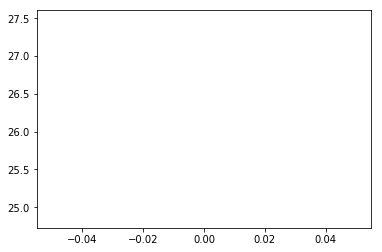

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [1] training...
  6%|▌         | 15/266 [00:00<00:01, 144.91it/s]

அன்                 	அவன்                	அமவன்               	அன்ன்               
அ                   	அன்                 	அவன்                	அன்                 
அன்                 	அவன்                	அமமமன்              	அழன்                
ஆல்                 	ஆகன்                	ஆல்                 	ஆன்ன்               
ஆன்                 	ஆன்ன்               	ஆன்                 	ஆன்ன்               
ஆல்ன்               	ஆன்ன்               	ஆகல்                	ஆமமவன்              
இன்                 	இன்ன்ன்             	இல்                 	இதன்                
இன்                 	இன்                 	இழல்                	இன்ன்               
இன்ன்               	இன்                 	இமமவன்              	இன்ன்               
ஈன்                 	ஈன்ன்               	ஈகல்                	ஈன்                 
ஈன்                 	ஈன்ன்               	ஈழழல்               	ஈன்                 
ஈன்                 	ஈன்                 	ஈமம                 	ஈன்          

100%|██████████| 266/266 [00:02<00:00, 112.36it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [1] training loss:24.51343536376953
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [2] training...
100%|██████████| 266/266 [00:02<00:00, 111.91it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [2] training loss:23.552978515625
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [3] training...
100%|██████████| 266/266 [00:02<00:00, 117.54it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [3] training loss:22.737503051757812
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [4] training...
100%|██████████| 266/266 [00:02<00:00, 106.12it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [4] training loss:22.1114501953125
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [5] training...
100%|██████████| 266/266 [00:02<00:00, 107.85it/s]
INF

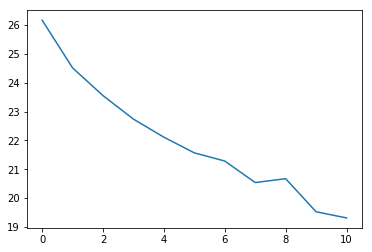

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [11] training...
  5%|▌         | 14/266 [00:00<00:01, 137.95it/s]

அகவல்வல்            	அருவன்பன்           	அகவல்வல்            	அன்றவன்பன்          
அகக்கவல்வல்         	அன்பன்பன்           	அகவல்வல்            	அருற்றவன்பன்        
அகலம்பி             	அகவற்றவன்பன்        	அகவல்வல்            	அகவயன்பன்           
ஆர்மகவல்வல்         	ஆன்றக்கவன்பன்       	ஆன்றல்வி            	ஆன்றக்கன்           
ஆற்றக்கவல்வி        	ஆன்பன்              	ஆற்றல்வல்           	ஆன்பன்பன்           
ஆற்றல்லன்           	ஆன்றக்கன்           	ஆன்றல்வல்           	ஆன்றக்கவன்          
இன்மகவல்வி          	இன்பன்பன்பன்        	இன்றல்வல்           	இன்றக்கன்பன்        
இகவல்வல்            	இன்பன்              	இன்றக்கவல்வல்       	இன்பன்பன்           
இன்பகவல்            	இன்றக்கவன்பன்       	இருல்வியல்          	இழக்கவன்பன்         
ஈகைக்கவல்வி         	ஈகைக்கன்            	ஈகைக்கவல்           	ஈழகவன்பன்           
ஈறக்கவல்            	ஈருவல்வன்பன்        	ஈகைக்கவல்           	ஈழகவன்பன்           
ஈகைக்கவல்வி         	ஈகைக்கவன்பன்        	ஈழகவல்வி            	ஈன்பன்       

100%|██████████| 266/266 [00:02<00:00, 110.96it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [11] training loss:18.91124725341797
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [12] training...
100%|██████████| 266/266 [00:02<00:00, 103.96it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [12] training loss:18.24001121520996
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [13] training...
100%|██████████| 266/266 [00:02<00:00, 109.64it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [13] training loss:17.925458908081055
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [14] training...
100%|██████████| 266/266 [00:02<00:00, 111.35it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [14] training loss:18.068157196044922
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [15] training...
100%|██████████| 266/266 [00:02<00:00, 106

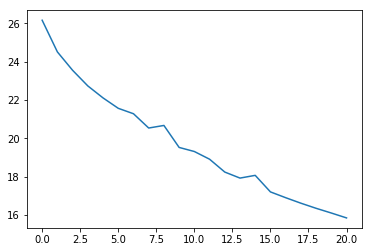

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [21] training...
  5%|▌         | 14/266 [00:00<00:01, 137.19it/s]

அருங்கலம்           	அருவளவன்            	அருக்கழ்தம்பி       	அர்க்கனற்பன்        
அகழ்தம்புலம்        	அருவியன்            	அருங்கலம்பி         	அகத்தழவன்பன்        
அருக்கடல்வி         	அகத்தற்றவன்         	அருவல்வி            	அகயன்பன்பன்         
ஆன்மருங்கையல்       	ஆற்றடற்றவன்         	ஆன்றக்கன்           	ஆற்றக்கலவன்         
ஆற்றக்கலம்பி        	ஆற்றவளவன்           	ஆன்றல்வியம்         	ஆன்பன்              
ஆன்றவல்             	ஆற்றவளவன்           	ஆற்றக்கலம்பி        	ஆற்றக்கன்பன்        
இன்றல்வி            	இயக்கன்பன்          	இன்றக்கன்பன்        	இயக்கோவன்           
இன்றல்              	இன்பற்றல்           	இன்றக்கலம்பி        	இளக்கவளவன்          
இன்றக்கனி           	இன்றவன்பன்          	இன்மகழ்தம்பி        	இன்றக்கன்பன்        
ஈகைக்கடல்           	ஈழவளவன்             	ஈகைக்கலம்புலம்      	ஈகைக்கன்பன்         
ஈகவளக்கு            	ஈழவன்பன்            	ஈகைக்கவல்லி         	ஈகையன்பன்           
ஈழழ்த்தம்புலம்      	ஈழவளவன்             	ஈகைக்கழ்தம்பி       	ஈன்பன்       

100%|██████████| 266/266 [00:02<00:00, 113.40it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [21] training loss:15.628440856933594
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [22] training...
100%|██████████| 266/266 [00:02<00:00, 109.54it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [22] training loss:16.396114349365234
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [23] training...
100%|██████████| 266/266 [00:02<00:00, 102.61it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [23] training loss:15.2401762008667
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [24] training...
100%|██████████| 266/266 [00:02<00:00, 106.14it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [24] training loss:15.543420791625977
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [25] training...
100%|██████████| 266/266 [00:02<00:00, 111

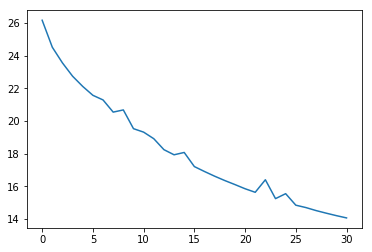

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [31] training...
  5%|▌         | 14/266 [00:00<00:01, 127.89it/s]

அகழ்தவன்மணி         	அன்னன்              	அகவளக்கு            	அகக்கனவன்           
அகழ்தம்புது         	அகன்பன்பன்          	அருவளரசு            	அகன்பன்             
அகத்தம்பு           	அன்பன்பன்           	அருவல்              	அருவளவன்            
ஆன்னன்மணி           	ஆற்றக்கோவன்         	ஆழிலம்புலி          	ஆற்றவளவன்           
ஆற்கைக்கண்ணி        	ஆழிவளவன்            	ஆற்றக்கயம்பு        	ஆன்பன்              
ஆர்க்கலம்           	ஆல்ர்க்கோவன்        	ஆற்றமகழ்            	ஆர்வளவன்            
இயல்வில்            	இன்றவளவன்           	இன்றல்வி            	இன்றவளன்            
இன்றக்கண்ணி         	இரற்கண்ணரவளன்       	இன்னற்கழகுயில்      	இயற்பழகுன்          
இன்பற்கலம்          	இன்பன்பன்           	இன்றன்மகழ்தல்       	இன்றக்கோவன்         
ஈழவளக்கு            	ஈகைவளன்             	ஈழவல்வி             	ஈழவளவன்             
ஈழக்கயக்குரி        	ஈழவளவன்             	ஈழவல்வல்            	ஈழவன்               
ஈழக்கழவள்           	ஈழவற்றவளன்          	ஈகைக்கயம்           	ஈகைக்கனற்பன் 

100%|██████████| 266/266 [00:02<00:00, 99.55it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [31] training loss:13.927968978881836
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [32] training...
100%|██████████| 266/266 [00:02<00:00, 116.51it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [32] training loss:13.803760528564453
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [33] training...
100%|██████████| 266/266 [00:02<00:00, 107.36it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [33] training loss:13.681299209594727
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [34] training...
100%|██████████| 266/266 [00:02<00:00, 106.14it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [34] training loss:13.569557189941406
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [35] training...
100%|██████████| 266/266 [00:02<00:00, 1

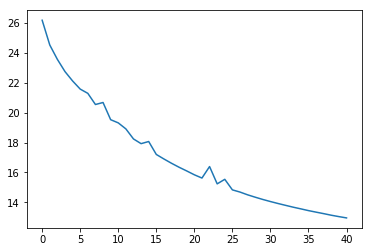

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [41] training...
  6%|▌         | 15/266 [00:00<00:01, 142.77it/s]

அருந்தம்            	அர்                 	அன்றல்வி            	அன்னரசன்            
அன்மன்றவள்          	அகயக்கோவன்          	அகக்கண்ணி           	அமகவளவன்            
அம்புகழ்            	அர்ர்               	அகவல்வி             	அன்றன்பன்னி         
ஆர்ர்மன்றக்கண்ணி    	ஆற்பழகன்            	ஆற்கைக்கழல்         	ஆற்கைக்கனற்பழகுன்   
ஆற்கைக்கயம்பு       	ஆலையன்பன்           	ஆயற்கைக்கயக்கனி     	ஆர்க்கனவன்          
ஆல்விறல்            	ஆற்பழகன்            	ஆற்கைக்கயம்பு       	ஆற்பழகுன்           
இறையம்பு            	இன்னன்பன்           	இயற்கழவள்           	இன்மருவளவன்         
இறைதற்கண்ணி         	இன்பவன்னி           	இன்னன்மயில்         	இளவளவன்             
இன்மர்க்கண்ணி       	இளக்கயக்கோவன்       	இன்றற்கழல்          	இளவளன்              
ஈகைக்குயில்         	ஈழவமுதன்னி          	ஈழவரசு              	ஈழவளவன்             
ஈகக்கனி             	ஈகைக்கோவன்          	ஈழவளக்கு            	ஈகைவளவன்பன்         
ஈழவல்               	ஈகைக்கண்ணர்பன்      	ஈழக்கண்ணி           	ஈழவளவன்      

100%|██████████| 266/266 [00:02<00:00, 111.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [41] training loss:12.879204750061035
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [42] training...
100%|██████████| 266/266 [00:02<00:00, 105.22it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [42] training loss:12.79527759552002
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [43] training...
100%|██████████| 266/266 [00:02<00:00, 104.48it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [43] training loss:12.716069221496582
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [44] training...
100%|██████████| 266/266 [00:02<00:00, 97.82it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [44] training loss:12.636524200439453
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [45] training...
100%|██████████| 266/266 [00:02<00:00, 11

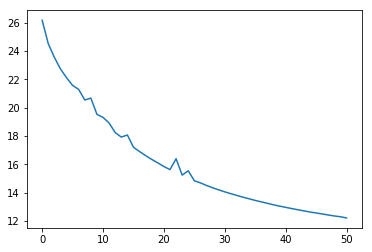

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [51] training...
  6%|▌         | 15/266 [00:00<00:01, 146.71it/s]

அகன்பம்மை           	அன்றவளன்            	அருங்கயம்பு         	அழகுமன்றன்          
அகக்கண்ணி           	அணிவுன்             	அம்பிந்தி           	அன்மன்றன்பன்        
அகன்பம்மை           	அகரவளவன்            	அகன்மருதம்மை        	அகரற்பழகன்          
ஆர்த்தகுன்றக்கயம்   	ஆர்                 	ஆர்ர்மன்றவள்        	ஆளிக்கனவளவன்        
ஆல்வியம்            	ஆர்வன்              	ஆற்பவள்             	ஆன்                 
ஆற்கைக்கண்ணி        	ஆல்விறல்            	ஆனிக்குன்றக்கயம்பு  	ஆழிக்கண்ணன்         
இன்பம்மை            	இசைக்கயவளல்         	இறைத்தங்கை          	இளன்பவளன்           
இறையன்னி            	இன்றக்கோவன்         	இறையல்வில்வியவல்லி  	இயற்கடல்வன்         
இன்ற்கழ்த்தங்கள்    	இளக்கத்தகக்கோவன்    	இன்மன்னன்மலர்       	இயற்பழகன்           
ஈகன்மன்றல்          	ஈகைக்கனல்வன்        	ஈழக்கயவள்ளி         	ஈகைர்த்திருவளல்     
ஈகைக்கயம்புகழ்      	ஈகைக்கோவன்          	ஈழற்கடல்லி          	ஈகைக்குன்றன்        
ஈழக்கண்ணி           	ஈழவளவளன்            	ஈழக்கயவள்           	ஈகைக்கனவன்னி 

100%|██████████| 266/266 [00:02<00:00, 110.18it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [51] training loss:12.134835243225098
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [52] training...
100%|██████████| 266/266 [00:02<00:00, 105.43it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [52] training loss:12.060686111450195
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [53] training...
100%|██████████| 266/266 [00:02<00:00, 102.29it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [53] training loss:11.9964599609375
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [54] training...
100%|██████████| 266/266 [00:02<00:00, 107.03it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [54] training loss:11.927982330322266
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [55] training...
100%|██████████| 266/266 [00:02<00:00, 116

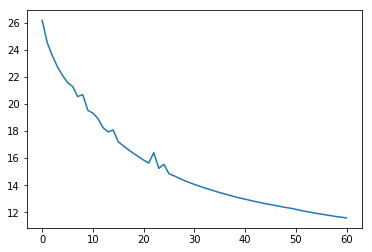

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [61] training...
  0%|          | 0/266 [00:00<?, ?it/s]

அடர்மலர்            	அம்பிந்தகத்தமிழ்    	அழர்த்திருவியம்     	அழகுமழவளவன்         
அருமையன்            	அழற்செம்பிந்தன்     	அருமைக்குமயில்      	அகரசத்தன்           
அரக்குமரி           	அன்மன்னன்           	அகன்மர்க்கண்        	அழகுமடன்            
ஆர்                 	ஆன்றவன்னி           	ஆற்றக்குன்றம்பு     	ஆற்றத்தமிழ்         
ஆற்குமரிவழகிள்      	ஆர்                 	ஆற்றக்கயம்          	ஆற்பவளவன்           
ஆற்கக்கண்ணி         	ஆழிலவளவன்           	ஆர்க்குமயில்        	ஆழிலவளன்            
இளக்கண்ணிளி         	இன்ர்               	இற்றற்கனம்மை        	இளக்குமடந்தன்       
இய்                 	இருஞ்த்தகவளன்       	இன்ர்               	இறைவல்லை            
இளத்தங்கை           	இயவளன்              	இன்பம்பு            	இயவன்னி             
ஈழவளக்கு            	ஈகைக்கனவன்னி        	ஈகன்மலர்வி          	ஈழச்சுடர்மணி        
ஈழவன்னி             	ஈகைக்கோவன்னி        	ஈகைக்கண்ணி          	ஈகக்கடல்            
ஈகன்மன்றவள்         	ஈகக்கனல்வன்         	ஈகைக்குன்றற்குன்றற்கழல்	ஈகக்கனல்  

100%|██████████| 266/266 [00:02<00:00, 112.99it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [61] training loss:11.53405475616455
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [62] training...
100%|██████████| 266/266 [00:02<00:00, 107.70it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [62] training loss:11.492871284484863
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [63] training...
100%|██████████| 266/266 [00:02<00:00, 107.31it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [63] training loss:11.441896438598633
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [64] training...
100%|██████████| 266/266 [00:02<00:00, 103.42it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [64] training loss:11.390798568725586
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [65] training...
100%|██████████| 266/266 [00:02<00:00, 83

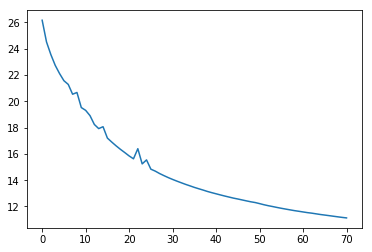

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [71] training...
  6%|▌         | 15/266 [00:00<00:01, 146.09it/s]

அன்மகழ்தம்          	அகரசன்பன்           	அருந்தலைவள்         	அரசத்தமிழ்          
அன்னல்வில்          	அன்மன்னன்பன்        	அண்ணல்வி            	அகன்மன்னன்பன்       
அகன்மயில்           	அகரற்பரிதிர்        	அகரட்சித்துணை       	அகர்ச்செல்வளவன்     
ஆழிவல்லி            	ஆழிலவன்             	ஆற்கைக்குமடந்தம்    	ஆன்னற்பரிதி         
ஆய்தற்கண்பன்        	ஆன்                 	ஆர்வளக்கண்ணி        	ஆளிர்த்திருவன்      
ஆற்றற்கடல்          	ஆழித்தமிழ்          	ஆர்வளவல்            	ஆர்க்கதிர்வேலோன்    
இறைமங்கையம்மை       	இன்னிக்குன்றன்      	இரியள்              	இன்றக்கோவன்         
இன்பன்              	இளக்கடல்            	இறைக்கயவள்          	இன்னிக்கோவன்        
இன்பவள்             	இறையற்பரிதி         	இளர்மலர்            	இளக்கதிர்           
ஈகக்கண்ணி           	ஈகக்கழவளன்          	ஈழக்குமயில்         	ஈகத்தன்             
ஈழக்கனம்மை          	ஈகைவளவன்னி          	ஈகைக்கயவள்ளி        	ஈகைவளவன்பன்         
ஈழக்கண்ணி           	ஈகை                 	ஈகைக்கயவள்          	ஈழச்செல்வன்  

100%|██████████| 266/266 [00:02<00:00, 106.90it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [71] training loss:11.090246200561523
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [72] training...
100%|██████████| 266/266 [00:02<00:00, 109.22it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [72] training loss:11.044069290161133
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [73] training...
100%|██████████| 266/266 [00:02<00:00, 111.33it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [73] training loss:11.017763137817383
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [74] training...
100%|██████████| 266/266 [00:02<00:00, 107.71it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [74] training loss:10.982559204101562
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [75] training...
100%|██████████| 266/266 [00:02<00:00, 1

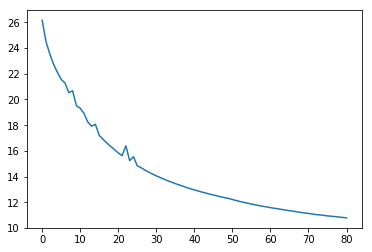

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [81] training...
  6%|▌         | 15/266 [00:00<00:01, 140.10it/s]

அரமங்கையள்          	அகத்தன்             	அரசத்திருவியம்      	அருவிரியன்          
அருங்கண்ணி          	அர்ர்               	அன்ர்               	அகர்த்திறவளன்       
அருங்கயம்           	அகரமுத்தன்          	அங்கனல்             	அணிகையன்பன்         
ஆளிக்கயவள்          	ஆன்                 	ஆற்றவள்             	ஆற்குன்றக்கோன்      
ஆர்விரினியம்பு      	ஆற்செல்வன்          	ஆற்றக்கண்ணி         	ஆன்                 
ஆளிர்               	ஆர்பன்              	ஆர்                 	ஆன்னியன்            
இயற்கனவல்லி         	இரியன்              	இயற்கழனி            	இன்பவளவன்           
இன்ன்ன்ன்ன்ன்மன்றற்கழல்	இன்ற்றக்கதிறவளன்    	இன்பம்மான்          	இன்பக்கனல்          
இறைவல்லி            	இளக்கோன்            	இருற்கக்குமடந்தை    	இயல்வேந்தன்         
ஈழக்குமயில்         	ஈழவளவன்             	ஈகையள்              	ஈழக்கனம்பி          
ஈழன்மயில்வி         	ஈகைக்கத்தகவளன்      	ஈழக்கண்ணி           	ஈழவன்               
ஈழர்                	ஈகையன்பன்           	ஈகவல்லி             	ஈழர்த்தமிழ

100%|██████████| 266/266 [00:02<00:00, 112.93it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [81] training loss:10.74009895324707
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [82] training...
100%|██████████| 266/266 [00:02<00:00, 95.24it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [82] training loss:10.707269668579102
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [83] training...
100%|██████████| 266/266 [00:02<00:00, 111.04it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [83] training loss:10.677690505981445
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [84] training...
100%|██████████| 266/266 [00:02<00:00, 105.59it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [84] training loss:10.650609970092773
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [85] training...
100%|██████████| 266/266 [00:02<00:00, 10

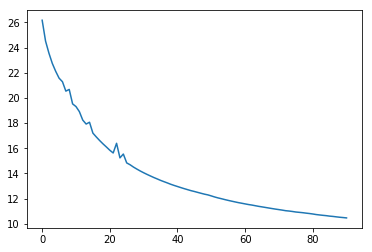

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [91] training...
  0%|          | 0/266 [00:00<?, ?it/s]

அகரவத்தமிழ்மணி      	அமகவன்              	அகன்பு              	அகரவளன்             
அன்னன்னல்வி         	அன்பன்பன்           	அம்புத்தமிழ்        	அன்                 
அமுதற்குமடந்தை      	அருவளவன்            	அருங்கயவடி          	அமுதன்              
ஆற்றமுது            	ஆற்பன்              	ஆற்கயவடிவு          	ஆற்றவழுதிர்         
ஆ                   	ஆன்                 	ஆற்கனற்கதிர்        	ஆற்கனியன்பன்        
ஆன்னிக்குன்றம்பன்   	ஆளியன்பன்           	ஆழித்தம்            	ஆற்சிரன்            
இரமுதற்குமயில்வி    	இன்                 	இன்றன்மயில்         	இயற்கண்ணல்          
இளர்த்தமிழ்         	இளக்கோவன்           	இயல்லி              	இன்பவளவன்           
இன்றன்மலர்          	இன்பவன்             	இ                   	இன்                 
ஈகவளக்கதிர்         	ஈழவன்               	ஈகவல்லி             	ஈகவளன்              
ஈகைக்கண்            	ஈழக்கோவன்           	ஈழவரண்ணி            	ஈகைக்குன்றவளன்      
ஈகயன்னை             	ஈழக்கோவன்           	ஈகைவல்லி            	ஈழவளவன்      

100%|██████████| 266/266 [00:02<00:00, 95.13it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [91] training loss:10.445658683776855
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [92] training...
100%|██████████| 266/266 [00:02<00:00, 100.33it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [92] training loss:10.41588020324707
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [93] training...
100%|██████████| 266/266 [00:02<00:00, 109.03it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [93] training loss:10.386543273925781
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [94] training...
100%|██████████| 266/266 [00:02<00:00, 116.24it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [94] training loss:10.370773315429688
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [95] training...
100%|██████████| 266/266 [00:02<00:00, 11

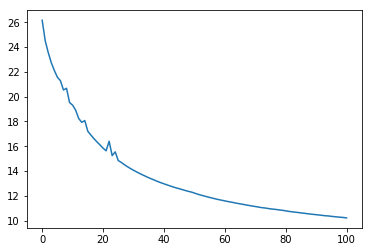

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [101] training...
  6%|▌         | 15/266 [00:00<00:01, 145.55it/s]

அகரமுதரவள்          	அன்புத்தகையன்       	அணிகையன்            	அன்பரிதி            
அன்ர்               	அகத்தன்             	அடர்த்தங்கள்        	அகரக்கனல்லோன்       
அருட்குமரி          	அரிக்குன்றன்        	அகன்மருதம்          	அரிதிர்ச்செல்வண்ணன் 
ஆர்வல்லையள்         	ஆழிக்கனலன்பன்       	ஆர்மையள்            	ஆளி                 
ஆன்னன்மலர்          	ஆழிலவன்             	ஆட்டியணி            	ஆழிலரசன்            
ஆன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ம	ஆற்றத்தமிழ்         	ஆர்மங்கை            	ஆண்கனலரசன்          
இன்மகழ்தமிழ்        	இறை                 	இறைஞ்சிமலர்         	இல்லையண்ணலன்        
இனங்கனல்லி          	இயல்வளவன்           	இன்னன்மலர்          	இறைதற்பரிதி         
இன்                 	இருவளவளவன்          	இரும்புத்தகை        	இளவன்பு             
ஈகர்த்தமிழ்தம்மை    	ஈழக்கடல்            	ஈகன்மன்றன்மணி       	ஈழத்தன்             
ஈகைக்கண்பல்லி       	ஈழக்கோவன்           	ஈகவல்லி             	ஈழவளம்              
ஈகன்மருதம்          	ஈகத்தன்             	ஈழக்கனி       

100%|██████████| 266/266 [00:02<00:00, 98.48it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [101] training loss:10.18769645690918
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [102] training...
100%|██████████| 266/266 [00:02<00:00, 115.81it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [102] training loss:10.169408798217773
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [103] training...
100%|██████████| 266/266 [00:02<00:00, 118.76it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [103] training loss:10.14613151550293
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [104] training...
100%|██████████| 266/266 [00:02<00:00, 113.03it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [104] training loss:10.126786231994629
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [105] training...
100%|██████████| 266/266 [00:02<00

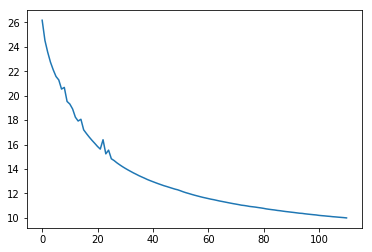

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [111] training...
  6%|▌         | 15/266 [00:00<00:01, 147.20it/s]

அன்மர்க்குயில்      	அரத்தவரன்           	அன்                 	அன்ர்               
அகரவரட்கதி          	அகரட்சியழகன்        	அகரவரசி             	அகன்பவன்            
அகரமுதல்விழி        	அகரவண்ணன்           	அகரற்குமரிவல்லி     	அகரற்கலவன்பன்       
ஆ                   	ஆ                   	ஆ                   	ஆர்மல்வன்           
ஆயத்தகுமடந்தை       	ஆற்றக்கோன்          	ஆற்கயம்             	ஆற்றத்தமிழ்         
ஆத்தவரட்டு          	ஆன்னின்புத்தன்      	ஆ                   	ஆர்வலவண்ணன்         
இன்மங்கையள்         	இற்பன்னி            	இசைத்தின்முத்துவள்  	இஞ்சத்தமிழ்         
இன்பு               	இளக்கனலன்பு         	இயல்                	இணர்க்கோவன்         
இன்                 	இன்ன்ன்றன்பவளவன்    	இன்சுள்             	இளவழுதிர்           
ஈழக்கனற்கலை         	ஈகன்பன்             	ஈல்                 	ஈகைக்கடல்லோன்       
ஈகக்கனல்லி          	ஈகற்செல்வன்         	ஈழக்கயம்            	ஈழத்தமிழ்           
ஈகை                 	ஈழவழகன்             	ஈகக்குமடந்தை        	ஈகக்கடல்     

100%|██████████| 266/266 [00:02<00:00, 100.73it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [111] training loss:9.991732597351074
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [112] training...
100%|██████████| 266/266 [00:02<00:00, 121.55it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [112] training loss:9.974715232849121
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [113] training...
100%|██████████| 266/266 [00:02<00:00, 117.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [113] training loss:9.949372291564941
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [114] training...
100%|██████████| 266/266 [00:02<00:00, 117.13it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [114] training loss:9.92848014831543
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [115] training...
100%|██████████| 266/266 [00:02<00:00

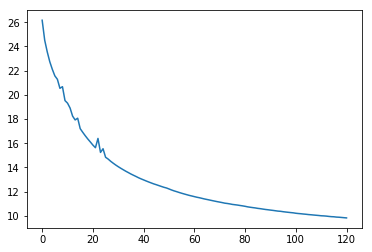

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [121] training...
  5%|▌         | 14/266 [00:00<00:01, 135.99it/s]

அறவன்மலர்           	அகரற்கனற்கழவரன்     	அம்மாற்பரி          	அருவிறலோன்          
அங்கனம்பு           	அணிகைன்பரிதி        	அகன்மயில்           	அருவன்பு            
அன்பு               	அகரவளவன்            	அன்மன்றல்லி         	அகரசறிவு            
ஆர்மைத்தகை          	ஆர்வழுதிர்          	ஆயல்வியம்மை         	ஆன்ட்சுடர்க்கோன்    
ஆர்மைத்தம்          	ஆற்றலவளன்           	ஆயத்தமிழ்           	ஆற்குன்றக்கோன்      
ஆழியன்னை            	ஆழித்தம்பி          	ஆன்                 	ஆழித்தமிழ்வன்       
இருதல்வி            	இரியம்பி            	இருங்குயில்         	இடலழகன்             
இன்பவல்லி           	இளக்கக்கனற்பன்      	இன்பவடிவு           	இ                   
இன்பு               	இறைமுத்தழகன்        	இளக்குன்றம்பம்      	இளக்கோன்            
ஈழக்கடலரசி          	ஈழக்கனவன்           	ஈகைக்குரல்லி        	ஈழன்மார்பரியழகன்    
ஈழவல்வளக்கனி        	ஈழன்பன்             	ஈகக்கடல்            	ஈழக்கோன்            
ஈழத்தமிழ்த்தலை      	ஈகைக்குமரத்தம்பி    	ஈழக்கடல்லி          	ஈழவழுதி      

100%|██████████| 266/266 [00:02<00:00, 100.82it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [121] training loss:9.804983139038086
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [122] training...
100%|██████████| 266/266 [00:02<00:00, 104.00it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [122] training loss:9.782232284545898
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [123] training...
100%|██████████| 266/266 [00:02<00:00, 102.93it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [123] training loss:9.755663871765137
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [124] training...
100%|██████████| 266/266 [00:02<00:00, 113.77it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [124] training loss:9.74778938293457
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [125] training...
100%|██████████| 266/266 [00:02<00:00

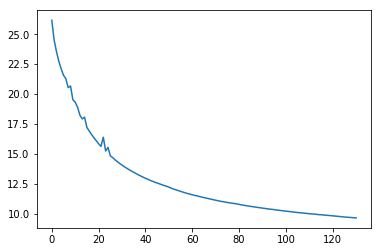

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [131] training...
  6%|▌         | 15/266 [00:00<00:01, 142.71it/s]

அன்னன்மருதம்        	அன்புத்தலையன்       	அகத்தமிழ்க்கனி      	அன்மாரியன்          
அறை                 	அமர்க்குன்றவன்      	அகக்கயல்            	அறதன்முத்தன்        
அகவளக்கண்ணி         	அருற்றலவளன்         	அன்ர்த்துன்லை       	அன்புத்துறை         
ஆட்சிட்டு           	ஆகல்வன்             	ஆற்றவல்வளக்கு       	ஆழியன்பு            
ஆன்ன்னின்மருதம்     	ஆழிலோன்             	ஆட்டுவன்னை          	ஆர்வில்             
ஆற்றிவுமுத்தம்பம்   	ஆட்சிவண்ணன்         	ஆற்றின்ற்சுடர்க்கயம்	ஆய்யம்பிறை          
இன்பக்கயவள்         	இன்ன்               	இணக்கண்ணி           	இளவளவன்             
இன்சுடன்மயில்வி     	இன்பன்னி            	இ                   	இன்பரிதியன்         
இரட்சிக்கனி         	இன்பக்கடல்          	இசைக்குயில்         	இளக்கோவன்           
ஈகைக்கடலரசி         	ஈகவுக்கோவன்         	ஈகற்குமடந்தை        	ஈழச்செல்வன்         
ஈகவல்லி             	ஈகையறிவுமுத்து      	ஈகக்கடலரசி          	ஈகவளவன்             
ஈகையன்மணி           	ஈழச்செத்திக்குன்றன் 	ஈகக்குரரசு          	ஈகைர்        

100%|██████████| 266/266 [00:02<00:00, 115.53it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [131] training loss:9.63492202758789
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [132] training...
100%|██████████| 266/266 [00:02<00:00, 108.33it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [132] training loss:9.620917320251465
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [133] training...
100%|██████████| 266/266 [00:02<00:00, 109.17it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [133] training loss:9.610434532165527
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [134] training...
100%|██████████| 266/266 [00:02<00:00, 100.18it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [134] training loss:9.594320297241211
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [135] training...
100%|██████████| 266/266 [00:02<00:00

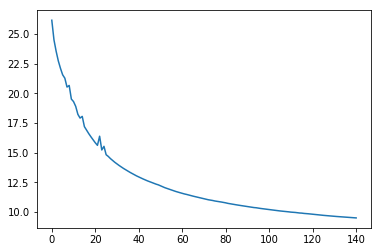

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [141] training...
  6%|▌         | 15/266 [00:00<00:01, 148.68it/s]

அணிமடந்தை           	அம்புத்தமிழ்        	அலக்குன்றம்பம்      	அருவன்              
அழத்தமிழ்           	அம்மாலம்பி          	அன்ர்               	அன்புத்தகை          
அங்கைக்கண்ணல்       	அகலவளவன்            	அழகுமடந்தை          	அகரவுப்பரிதியன்     
ஆ                   	ஆன்                 	ஆற்றத்திறல்         	ஆர்வளவளம்பி         
ஆற்றிமுதற்செல்வி    	ஆங்கைமலையன்         	ஆற்றலக்கனி          	ஆழியன்பு            
ஆயங்குமுத்துப்பொழில்	ஆர்த்தமிழ்          	ஆர்க்குமரியள்       	ஆடல்விரியரசன்       
இன்பவல்லி           	இருதற்பன்           	இருங்கழ்            	இறிஞ்சத்தன்         
இலர்கடலழகி          	இயற்பரிதி           	இயற்பம்             	இத்தழகவன்           
இருற்கழல்           	இன்பவளவழுதி         	இய்தல்வி            	இருஞ்சிக்கோவன்      
ஈகை                 	ஈகன்மார்பன்         	ஈகவளக்குயில்        	ஈடவன்               
ஈழக்கனி             	ஈழத்தமிழ்           	ஈழக்கண்ணி           	ஈகரற்செல்வன்        
ஈழக்கடல்            	ஈகக்குன்றன்         	ஈகக்குன்றம்பம்      	ஈகவளவன்      

100%|██████████| 266/266 [00:02<00:00, 114.99it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [141] training loss:9.50064754486084
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [142] training...
100%|██████████| 266/266 [00:02<00:00, 101.36it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [142] training loss:9.483846664428711
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [143] training...
100%|██████████| 266/266 [00:02<00:00, 97.37it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [143] training loss:9.468425750732422
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [144] training...
100%|██████████| 266/266 [00:02<00:00, 102.73it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [144] training loss:9.460902214050293
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [145] training...
100%|██████████| 266/266 [00:02<00:00

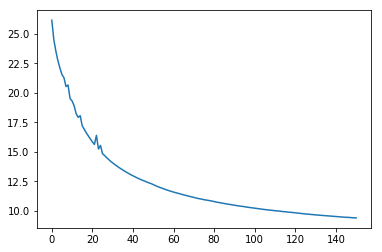

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [151] training...
  6%|▌         | 15/266 [00:00<00:01, 139.20it/s]

அருதரண்             	அருதன்              	அகத்தமிழ்யாள்       	அழகப்பரிதி          
அகவளக்குயில்        	அகத்தன்             	அகரவிரியம்பம்       	அகன்முத்தன்         
அரற்கண்முல்லை       	அணி                 	அணிகையல்வியம்       	அவையல்வன்           
ஆழிவிரிவியம்மை      	ஆழினியன்            	ஆ                   	ஆ                   
ஆர்கடலழகி           	ஆ                   	ஆன்லை               	ஆழகக்கண்ணன்         
ஆற்ன்ன்மன்லைக்குன்றக்கயம்	ஆர்வண்ணல்வன்        	ஆவையர்த்துறைக்குயில்	ஆன்றலன்             
இன்                 	இன்றன்பன்           	இருஞ்டழம்பம்        	இளக்கடல்            
இளர்த்தலையழகு       	இறை                 	இன்பவல்லி           	இன்பன்பன்           
இ                   	இளவன்பு             	இன்பும்புன்மலர்     	இங்கையரசன்          
ஈகயன்               	ஈகன்மன்னன்          	ஈகவல்லியள்          	ஈகைவன்மலையன்        
ஈழக்குன்றம்பு       	ஈழவன்               	ஈகன்மகளக்கு         	ஈகைக்கோமான்         
ஈகக்குமரிக்கனி      	ஈகைக்குன்றன்        	ஈகவல்               	ஈல்     

100%|██████████| 266/266 [00:02<00:00, 110.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [151] training loss:9.372538566589355
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [152] training...
100%|██████████| 266/266 [00:02<00:00, 110.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [152] training loss:9.366262435913086
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [153] training...
100%|██████████| 266/266 [00:02<00:00, 104.27it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [153] training loss:9.350849151611328
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [154] training...
100%|██████████| 266/266 [00:02<00:00, 116.32it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [154] training loss:9.343490600585938
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [155] training...
100%|██████████| 266/266 [00:02<00:0

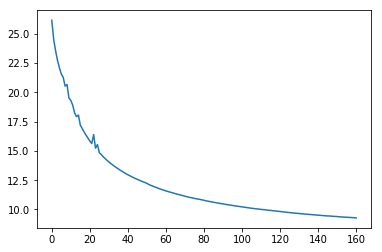

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [161] training...
  6%|▌         | 15/266 [00:00<00:01, 145.13it/s]

அன்குன்றை           	அன்பு               	அணி                 	அகவளவன்             
அத்திப்புனல்        	அணிகைவிரிதி         	அகத்தமிழ்           	அரிமலையன்           
அலம்புகழ்           	அன்புத்தகை          	அகம்மை              	அருலவன்             
ஆர்மலர்             	ஆட்சியன்            	ஆ                   	ஆற்றியப்பன்         
ஆழித்தங்கம்         	ஆழி                 	ஆற்றலக்குன்றம்      	ஆன்ர்               
ஆசைக்கடல்           	ஆல்                 	ஆளி                 	ஆசைச்செல்வரன்       
இல்வியம்மை          	இளக்கோன்            	இய்யன்              	இயற்குமரன்          
இயிற்செல்வம்மை      	இன்றிவுச்சின்மார்பரிதியன்	இருஞ்த்தமிழ்மலர்    	இடல்வளவன்           
இன்றன்மயில்         	இறியற்குறிஞ்சிக்கதிர்	இரின்புனல்லி        	இருஞ்சியன்          
ஈழமை                	ஈகவுச்சிச்சேரன்பன்  	ஈகயன்னை             	ஈழவழுதிறல்          
ஈழர்த்தங்கை         	ஈகயழகன்             	ஈழத்தலைவள்ளி        	ஈகத்தமிழ்           
ஈழத்தமிழ்           	ஈகைக்குன்றவன்       	ஈழக்குயில்          	ஈகவளவன்

100%|██████████| 266/266 [00:02<00:00, 115.70it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [161] training loss:9.267298698425293
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [162] training...
100%|██████████| 266/266 [00:02<00:00, 108.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [162] training loss:9.260872840881348
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [163] training...
100%|██████████| 266/266 [00:02<00:00, 113.54it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [163] training loss:9.24437141418457
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [164] training...
100%|██████████| 266/266 [00:02<00:00, 100.23it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [164] training loss:9.239288330078125
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [165] training...
100%|██████████| 266/266 [00:02<00:00

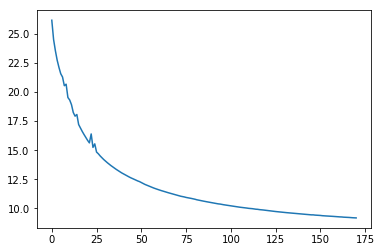

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [171] training...
  6%|▌         | 15/266 [00:00<00:01, 146.29it/s]

அகன்குன்றை          	அலையழகன்            	அகரசு               	அடற்கலம்            
அருவம்மை            	அருங்கி             	அம்மாச்செல்வி       	அன்                 
அருல்வல்லி          	அடர்த்தமிழ்         	அர்ர்குழம்மை        	அன்பின்             
ஆர்கடலழகு           	ஆழிக்குன்றக்குன்றன் 	ஆற்றத்தாய்தல்       	ஆழிலோன்             
ஆழித்தங்கை          	ஆந்தையலவந்தன்       	ஆற்றலம்பு           	ஆழி                 
ஆன்றன்மன்றல்        	ஆத்திக்கிழான்       	ஆழிவுக்கண்ணி        	ஆட்சித்தன்          
இலக்கடலழகி          	இளவளல்              	இருதற்கண்ணி         	இன்மன்னன்னன்        
இல்லைத்தகை          	இன்ன்ன்சுன்         	இர்விரி             	இன்பரிதி            
இருல்விரியம்பண்     	இயலியரசன்           	இன்றன்குன்றக்குன்றம்பு	இன்னிக்குமரசத்தன்   
ஈகன்பம்மை           	ஈகைக்குன்றன்        	ஈகவல்லி             	ஈகைவளவன்            
ஈகக்கயம்            	ஈழவழுதி             	ஈகல்வியல்           	ஈகற்பரிதி           
ஈகன்முத்தம்பம்      	ஈகசைச்செந்தின்முத்தழகன்	ஈகவல்லி             	ஈகரசன்  

100%|██████████| 266/266 [00:02<00:00, 110.35it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [171] training loss:9.16304874420166
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [172] training...
100%|██████████| 266/266 [00:02<00:00, 100.87it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [172] training loss:9.151698112487793
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [173] training...
100%|██████████| 266/266 [00:02<00:00, 96.73it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [173] training loss:9.153231620788574
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [174] training...
100%|██████████| 266/266 [00:02<00:00, 107.19it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [174] training loss:9.141044616699219
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [175] training...
100%|██████████| 266/266 [00:02<00:00

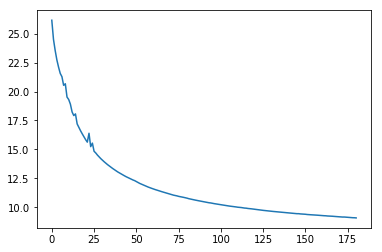

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [181] training...
  5%|▍         | 13/266 [00:00<00:02, 125.86it/s]

அருதம்மை            	அறவளவழுதி           	அம்மை               	அரல்வில்            
அங்கற்பரி           	அம்மைந்தன்          	அம்மாமடந்தை         	அணிகைப்பொழிலன்      
அறவழகி              	அருதன்              	அகவளக்கனி           	அலையறிஞன்           
ஆழிவிரினியன்மணி     	ஆர்வல்வைவளவழுதி     	ஆர்பகல்             	ஆர்வேந்தனல்லோன்     
ஆர்                 	ஆர்கடலழகன்          	ஆம்                 	ஆட்டியமுதன்         
ஆட்டியமுதம்         	ஆட்டுமலையன்         	ஆர்வல்லவி           	ஆடல்வளவன்           
இருல்லைச்சிச்சிமருதம்	இகன்பன்             	இரிவளக்கனி          	இலவரசன்             
இளம்பவள்            	இறையலம்பி           	இயற்கடல்            	இ                   
இளக்குன்றக்கயம்     	இணர்த்தமிழவன்       	இன்புன்னை           	இருங்கனல்           
ஈகையரண்கதி          	ஈகக்கோவன்           	ஈகலர்               	ஈழவழுதிர்           
ஈகக்கயல்            	ஈழனியறிஞன்பன்       	ஈழற்கழக்குன்றக்கனி  	ஈகத்திறவன்பு        
ஈழக்குரல்           	ஈகன்பரிதி           	ஈகம்பு              	ஈழச்செந்திறவ

100%|██████████| 266/266 [00:02<00:00, 112.48it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [181] training loss:9.060230255126953
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [182] training...
100%|██████████| 266/266 [00:02<00:00, 106.57it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [182] training loss:9.052650451660156
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [183] training...
100%|██████████| 266/266 [00:02<00:00, 104.02it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [183] training loss:9.054981231689453
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [184] training...
100%|██████████| 266/266 [00:02<00:00, 107.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [184] training loss:9.03115463256836
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [185] training...
100%|██████████| 266/266 [00:02<00:00

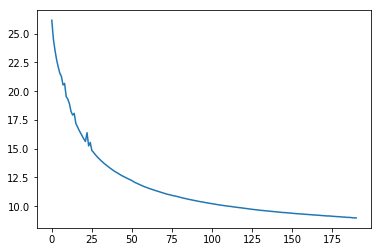

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [191] training...
  6%|▌         | 15/266 [00:00<00:01, 145.34it/s]

அன்                 	அத்தன்பன்           	அ                   	அணியரசன்            
அணிகுமடந்தை         	அணி                 	அருவளத்தகை          	அம்பிறிஞன்          
அகக்குமரியள்        	அன்றக்குன்றன்       	அருவரசு             	அருற்கலக்கண்ணன்     
ஆர்                 	ஆடலழகன்             	ஆ                   	ஆர்முத்தன்          
ஆ                   	ஆற்றலம்புத்தமிழ்த்து	ஆற்றலமுதம்          	ஆண்ணவழகன்           
ஆர்கலம்பரிதி        	ஆர்மை               	ஆர்வன்மலர்          	ஆன்                 
இசை                 	இன்பரிதி            	இன்பவன்மணி          	இன்மன்னன்           
இறையழகி             	இளக்கடல்            	இன்பம்              	இளவளவழுதி           
இலங்கயம்            	இன்பவளவன்           	இர்கழல்             	இசை                 
ஈகை                 	ஈகழிலவன்            	ஈழக்குயில்          	ஈடர்                
ஈகையன்மணி           	ஈழக்கோமான்          	ஈழத்தமிழ்           	ஈகைக்குன்றக்கண்ணன்  
ஈகை                 	ஈகை                 	ஈழக்கு              	ஈழத்தன்      

100%|██████████| 266/266 [00:02<00:00, 119.09it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [191] training loss:8.971867561340332
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [192] training...
100%|██████████| 266/266 [00:02<00:00, 117.08it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [192] training loss:8.972248077392578
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [193] training...
100%|██████████| 266/266 [00:02<00:00, 99.26it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [193] training loss:8.961095809936523
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [194] training...
100%|██████████| 266/266 [00:02<00:00, 110.08it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [194] training loss:8.949066162109375
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [195] training...
100%|██████████| 266/266 [00:02<00:0

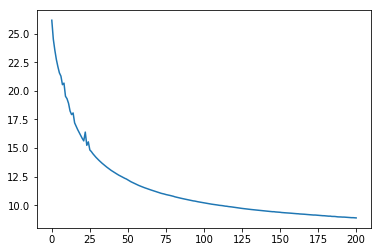

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [201] training...
  6%|▌         | 15/266 [00:00<00:01, 145.09it/s]

அகம்                	அகலக்கோவன்          	அரசப்பண்            	அன்மான்             
அரவைமங்கை           	அன்பவளவன்           	அமர்த்தங்கம்        	அமர்                
அந்தமிழ்த்தேன்      	அருமை               	அமர்கழனியாள்        	அணி                 
ஆர்வயட்கலம்         	ஆழித்தமிழ்          	ஆசைக்குன்றைச்சுடன்மடந்தை	ஆட்சியவன்           
ஆடலம்மை             	ஆன்                 	ஆழிலரசி             	ஆந்தனல்             
ஆளி                 	ஆழிவன்              	ஆற்கைப்புகழல்       	ஆல்                 
இளக்குமரியள்        	இருங்கிழான்         	இன்பன்மலர்          	இசையண்ணல்லன்        
இன்பவல்லாள்         	இளக்கதிர்           	இளர்தழகிள்ளை        	இளக்கனல்            
இலங்கண்ணி           	இன்பன்பன்           	இ                   	இனியவன்             
ஈழக்குன்றம்         	ஈகக்கனல்            	ஈகை                 	ஈழவழுதிர்           
ஈகைக்குன்றம்        	ஈழவளவழுதிர்         	ஈழவன்மடந்தை         	ஈழர்மைத்திறலோன்     
ஈற்ங்கக்குமரத்தழக்கயம்	ஈகைக்குன்றன்        	ஈகைச்சிட்சியம்மை    	ஈழத்தமி

100%|██████████| 266/266 [00:02<00:00, 110.57it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [201] training loss:8.882675170898438
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [202] training...
100%|██████████| 266/266 [00:02<00:00, 105.55it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [202] training loss:8.888218879699707
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [203] training...
100%|██████████| 266/266 [00:02<00:00, 118.86it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [203] training loss:8.876412391662598
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [204] training...
100%|██████████| 266/266 [00:02<00:00, 115.95it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [204] training loss:8.873785018920898
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [205] training...
100%|██████████| 266/266 [00:02<00:0

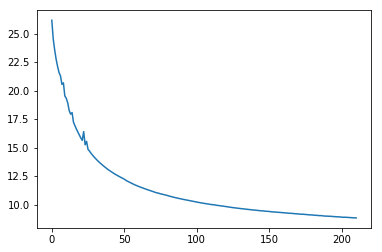

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [211] training...
  6%|▌         | 15/266 [00:00<00:01, 138.61it/s]

அணிக்குயில்         	அவைப்பிறிவுமுரசு    	அம்பரிதி            	அருற்றலவன்          
அருன்மன்            	அகரினியறிவழுதி      	அகரப்புப்பிணை       	அணிணியறிஞன்         
அகன்மலர்            	அன்புத்துறையன்      	அல்ன்மருதம்         	அறவளவழுதிர்         
ஆய்வமுதம்மை         	ஆலக்கடல்            	ஆர்கடலழகி           	ஆன்                 
ஆர்விறலமை           	ஆங்குமலையன்         	ஆட்சியம்            	ஆற்றலன்             
ஆ                   	ஆடலவன்              	ஆர்கடம்புத்தி       	ஆ                   
இணர்வளக்குன்        	இன்னின்முத்தன்      	இன்பக்கயம்          	இன்பமுத்தன்         
இணம்பு              	இறிவுக்கண்ணல்       	இருஞ்சி             	இறலவரசன்            
இன்பின்சிட்டு       	இயற்பரிதி           	இயற்குயில்          	இளக்கண்ணன்          
ஈலப்பரசு            	ஈழக்கிழான்          	ஈகற்கண்ணல்லி        	ஈகைக்கோமாறன்        
ஈழவரட்டு            	ஈகைமார்             	ஈழக்கயல்            	ஈகவளவன்             
ஈகை                 	ஈகைக்கோமாறன்        	ஈழற்சுடர்           	ஈகைப்பொழில்  

100%|██████████| 266/266 [00:02<00:00, 109.93it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [211] training loss:8.818177223205566
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [212] training...
100%|██████████| 266/266 [00:02<00:00, 104.44it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [212] training loss:8.810901641845703
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [213] training...
100%|██████████| 266/266 [00:02<00:00, 95.35it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [213] training loss:8.803542137145996
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [214] training...
100%|██████████| 266/266 [00:02<00:00, 110.67it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [214] training loss:8.806235313415527
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [215] training...
100%|██████████| 266/266 [00:02<00:0

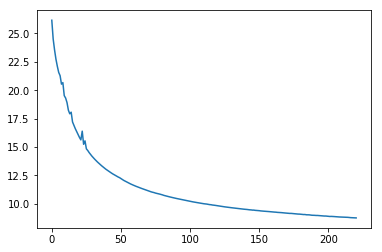

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [221] training...
  6%|▌         | 15/266 [00:00<00:01, 146.78it/s]

அறதரசி              	அன்                 	அன்                 	அமரசன்              
அலையல்லிகை          	அன்                 	அருதங்கை            	அன்புத்தன்          
அகன்குமன்றக்கயம்    	அணித்தலைவழுதி       	அங்களக்குன்         	அன்பரிதிரோன்        
ஆ                   	ஆர்வல்வைமாறவன்பு    	ஆழிக்கயல்           	ஆழினி               
ஆற்த்தலைப்பொழில்    	ஆழித்தலைவன்பு       	ஆர்வன்மன்றன்மதி     	ஆத்திறிவண்ணன்       
ஆர்                 	ஆ                   	ஆசைத்மணிக்குன்றம்பு 	ஆல்                 
இயின்மங்கை          	இன்                 	இன்பவல்லி           	இன்                 
இன்                 	இருவவன்             	இருவல்வன்           	இறை                 
இசைக்கன்ற்சுடரல்    	இணர்வண்ணன்          	இ                   	இளவழுதி             
ஈகரசு               	ஈகைவழுதி            	ஈகைவிரிசிமங்கை      	ஈகையப்பன்           
ஈகைவளக்கனி          	ஈகன்பன்             	ஈகை                 	ஈகன்மறவன்           
ஈகை                 	ஈகச்செல்வன்         	ஈகை                 	ஈகைப்பிறை    

100%|██████████| 266/266 [00:02<00:00, 114.79it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [221] training loss:8.750138282775879
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [222] training...
100%|██████████| 266/266 [00:02<00:00, 106.43it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [222] training loss:8.744670867919922
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [223] training...
100%|██████████| 266/266 [00:02<00:00, 104.35it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [223] training loss:8.73214054107666
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [224] training...
100%|██████████| 266/266 [00:02<00:00, 116.31it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [224] training loss:8.725635528564453
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [225] training...
100%|██████████| 266/266 [00:02<00:00

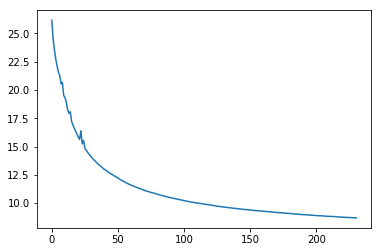

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [231] training...
  6%|▌         | 15/266 [00:00<00:01, 147.71it/s]

அருவள்ளி            	அரிதி               	அன்பவல்லி           	அகரஞ்சன்            
அன்கயலம்மை          	அகரஞ்சறிஞன்         	அணிகை               	அழவயவன்             
அல்லித்தமிழ்வி      	அடலக்கிழான்         	அன்வன்மடந்தை        	அருமைவளத்தன்        
ஆற்பக்குயில்        	ஆடலழகன்             	ஆற்றத்தன்பம்        	ஆ                   
ஆற்சுடர்க்குன்றைக்குன்றற்கதி	ஆழிக்கண்ணன்         	ஆற்றலரண்ணி          	ஆற்றலவந்தனன்பு      
ஆள்                 	ஆற்றுவளம்பி         	ஆற்டியம்            	ஆன்                 
இன்                 	இளக்கடல்            	இந்தல்              	இலம்பரிதி           
இயலமுத்தமமடந்தை     	இன்ன்றை             	இசையற்குமடந்தை      	இருஞ்சான்           
இறை                 	இறைக்குன்றக்குன்றவன்	இயற்குமரரண்பசு      	இல்லியன்            
ஈல்வல்லி            	ஈகைமைமைரினியன்      	ஈகவன்னி             	ஈகைக்கோன்           
ஈழக்குன்றம்பு       	ஈகவின்முத்துத்துளவன்பு	ஈழக்குன்றம்         	ஈகை                 
ஈல்                 	ஈகையறிஞன்           	ஈழக்குமரி           	ஈழந

100%|██████████| 266/266 [00:02<00:00, 115.57it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [231] training loss:8.680992126464844
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [232] training...
100%|██████████| 266/266 [00:02<00:00, 106.50it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [232] training loss:8.676260948181152
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [233] training...
100%|██████████| 266/266 [00:02<00:00, 99.27it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [233] training loss:8.660600662231445
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [234] training...
100%|██████████| 266/266 [00:02<00:00, 90.26it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [234] training loss:8.663458824157715
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [235] training...
100%|██████████| 266/266 [00:02<00:0

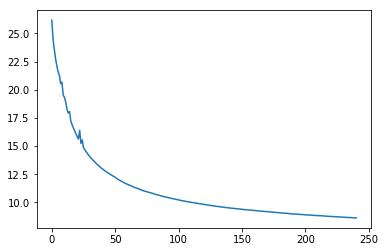

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [241] training...
  6%|▌         | 15/266 [00:00<00:01, 138.17it/s]

அன்ன்குன்றை         	அல்வையன்            	அன்சிலம்பு          	அரசத்தமிழ்          
அத்த்தலைச்செல்வம்   	அத்தன்னன்           	அம்மானி             	அன்                 
அரசச்செல்வி         	அன்                 	அலைவிறலரசி          	அரஞ்சியன்           
ஆத்தமிழ்            	ஆட்சிமருதன்         	ஆழிச்சி             	ஆர்வல்வழுதி         
ஆழிக்குன்றம்பல்     	ஆழியன்              	ஆ                   	ஆர்வண்ணன்           
ஆகவளம்புணை          	ஆற்செல்வரசன்        	ஆசையல்லி            	ஆரஞ்சியன்           
இருதங்கயம்          	இருற்செம்பிற்கதிர்  	இறையற்சிலம்பு       	இற்றற்கடலன்         
இருங்கயம்           	இணர்த்துறைவழுதி     	இன்ர்க்குன்றம்பண்   	இறைஞ்சியழகன்        
இருஞ்சாரல்          	இளன்பன்             	இன்ர்வன்            	இன்னின்மான்பரிதி    
ஈகையணி              	ஈழக்கிழான்          	ஈகைச்சிட்டு         	ஈழத்மறவழுதி         
ஈழக்குன்றம்         	ஈழவழுதிர்           	ஈகற்கண்பல்          	ஈகையரசன்            
ஈழக்குன்றம்பு       	ஈழத்தமிழ்           	ஈழச்செல்வி          	ஈகவளவன்      

100%|██████████| 266/266 [00:02<00:00, 111.71it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [241] training loss:8.616989135742188
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [242] training...
100%|██████████| 266/266 [00:02<00:00, 102.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [242] training loss:8.608323097229004
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [243] training...
100%|██████████| 266/266 [00:02<00:00, 109.60it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [243] training loss:8.597389221191406
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [244] training...
100%|██████████| 266/266 [00:02<00:00, 110.77it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [244] training loss:8.593149185180664
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [245] training...
100%|██████████| 266/266 [00:02<00:0

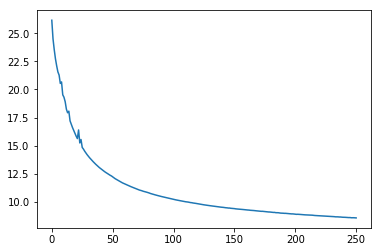

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [251] training...
  6%|▌         | 15/266 [00:00<00:01, 146.05it/s]

அம்மாமங்கை          	அம்பண்ணன்           	அம்பிள்ளை           	அகரமன்னன்           
அருவன்              	அம்மைம்புலன்        	அகத்துறை            	அரிதிம்புக்கோன்     
அம்மாவி             	அருஞ்சாரன்          	அண்கண்முத்தம்       	அரிமாரியன்பு        
ஆற்றலம்மா           	ஆற்யரசன்            	ஆயற்செல்வம்         	ஆ                   
ஆட்டியச்செல்வி      	ஆழித்தலைவன்         	ஆன்                 	ஆசைச்சிமுத்தன்      
ஆயற்குறிஞ்சி        	ஆர்வண்ணம்           	ஆ                   	ஆத்மைக்கடல்         
இருங்கயம்           	இளவண்ணன்            	இன்பிள்ளை           	இறைந்தை             
இள்                 	இறை                 	இருங்கண்ணி          	இன்பின்             
இன்பரிதி            	இன்னிரியன்பு        	இயலல்               	இதிங்கண்முத்தம்பி   
ஈழக்குமரி           	ஈழந்தனல்            	ஈகை                 	ஈகண்முத்துரைவன்     
ஈகற்பரிதி           	ஈழக்கிழான்          	ஈகைன்குன்றை         	ஈகைச்சிரியன்        
ஈகத்தமிழ்           	ஈகப்புகழவன்         	ஈழக்குயில்          	ஈகக்குன்றன்  

100%|██████████| 266/266 [00:02<00:00, 106.06it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [251] training loss:8.551892280578613
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [252] training...
100%|██████████| 266/266 [00:02<00:00, 110.70it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [252] training loss:8.55522632598877
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [253] training...
100%|██████████| 266/266 [00:02<00:00, 83.86it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [253] training loss:8.550241470336914
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [254] training...
100%|██████████| 266/266 [00:02<00:00, 111.38it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [254] training loss:8.53503704071045
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [255] training...
100%|██████████| 266/266 [00:02<00:00,

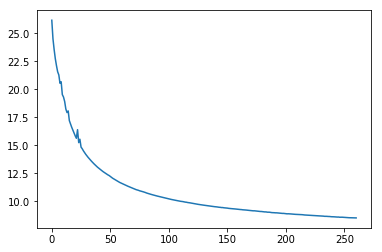

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [261] training...
  6%|▌         | 15/266 [00:00<00:01, 146.64it/s]

அல்வைமலர்           	அன்                 	அடலமுதம்மை          	அன்பன்பன்           
அல்வி               	அருமைக்குமரிவன்     	அல்குன்றை           	அகவளத்தன்           
அமைர்               	அகரவுமுத்தம்பி      	அடற்செந்தமிழ்யாள்   	அணி                 
ஆழிவுச்சின்மன்றை    	ஆழிக்கடல்           	ஆற்றலக்கயம்         	ஆளிர்முத்தன்        
ஆற்றத்தமிழ்யாள்     	ஆர்வண்ணன்           	ஆயப்புத்தமிழ்       	ஆ                   
ஆத்துப்புகழ்        	ஆற்றச்சென்னி        	ஆழியன்மலர்          	ஆகைத்தம்பி          
இன்கன்சுன்          	இன்வளத்தன்          	இறைத்திருந்தி       	இறை                 
இன்பிள்             	இரியன்              	இல்கனிலவு           	இலம்பிலவன்          
இளத்தலைவள்ளி        	இரும்புத்தகையன்     	இளக்கயம்            	இளவழுதி             
ஈண்ணல்வி            	ஈழவழுதிர்           	ஈர்                 	ஈகவன்               
ஈகைக்கடல்           	ஈகைன்முடிமுருகன்    	ஈகைச்சிமருதம்       	ஈகற்றவழுதி          
ஈகை                 	ஈகைத்திறல்          	ஈகன்மருதம்          	ஈகச்சென்னன்பன

100%|██████████| 266/266 [00:02<00:00, 114.95it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [261] training loss:8.519956588745117
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [262] training...
100%|██████████| 266/266 [00:02<00:00, 103.53it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [262] training loss:8.509157180786133
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [263] training...
100%|██████████| 266/266 [00:02<00:00, 109.44it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [263] training loss:8.50234317779541
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [264] training...
100%|██████████| 266/266 [00:02<00:00, 106.11it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [264] training loss:8.497000694274902
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [265] training...
100%|██████████| 266/266 [00:02<00:00

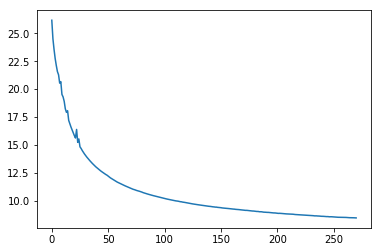

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [271] training...
  6%|▌         | 15/266 [00:00<00:01, 145.99it/s]

அணிகுன்றக்கயம்      	அன்பன்              	அருன்னம்மை          	அன்கழவன்            
அமர்த்தலைவிழி       	அரின்புலவன்         	அல்னல்              	அடற்செல்லரசு        
அலரிதிக்கயல்        	அழற்செத்தக்கனல்     	அணிப்புன்பம்        	அறப்புலவழுதி        
ஆல்லை               	ஆல்லைமுருகன்        	ஆட்சிமடந்தை         	ஆட்சியன்            
ஆழித்தகை            	ஆ                   	ஆற்செல்வளத்தகை      	ஆய்வல்வேல்          
ஆயன்பம்மை           	ஆளிநாகண்ணாண்பறல்    	ஆழிக்குமரி          	ஆற்ன்ன்முத்துறை     
இலப்புத்தகை         	இன்பல்லோன்          	இற்றலம்மான்         	இன்                 
இன்                 	இளக்கோன்            	இறைக்குன்றம்        	இகையன்              
இல்புத்துப்புகழ்    	இரினியனியழகன்       	இ                   	இஞ்சிலம்பி          
ஈகவரட்சிட்டு        	ஈழவன்               	ஈகை                 	ஈழவழுதிருவன்        
ஈகன்பம்             	ஈகையறிவுக்கோவன்     	ஈகன்பரிதி           	ஈகை                 
ஈகை                 	ஈகலன்               	ஈழக்கனி             	ஈகைச்சின்பரித

100%|██████████| 266/266 [00:02<00:00, 107.09it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [271] training loss:8.475788116455078
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [272] training...
100%|██████████| 266/266 [00:02<00:00, 94.49it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [272] training loss:8.468850135803223
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [273] training...
100%|██████████| 266/266 [00:02<00:00, 117.17it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [273] training loss:8.471748352050781
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [274] training...
100%|██████████| 266/266 [00:02<00:00, 120.78it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [274] training loss:8.470312118530273
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [275] training...
100%|██████████| 266/266 [00:02<00:0

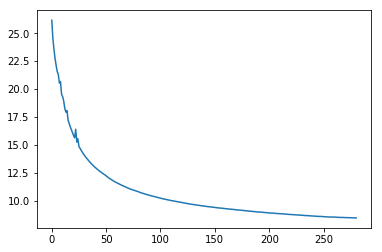

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [281] training...
  6%|▌         | 15/266 [00:00<00:01, 142.81it/s]

அகன்சிலம்பு         	அறத்துத்தமிழன்      	அகத்தென்னல்வி       	அகரவலவன்            
அல்வைவிழியம்மை      	அம்மானன்            	அழக்குமரியள்        	அருமைக்கண்ணன்       
அலர்கழல்            	அகத்தேவலவன்         	அங்கண்முத்தம்       	அன்புலவன்           
ஆன்றன்மன்றத்தம்மை   	ஆளக்கோவன்           	ஆற்றலவல்லி          	ஆற்குன்றக்குன்றன்பு 
ஆகன்னெறிவளத்தகை     	ஆழினியன்            	ஆர்குமரிக்கயம்      	ஆழின்முத்தன்        
ஆர்விறல்            	ஆளிவளத்தன்          	ஆடலம்               	ஆ                   
இன்மைன்குறின்புமுகிற்சுடல்லி	இன்பரியன்           	இந்திலல்            	இரிமுதல்லன்         
இலக்குன்றம்பு       	இன்றன்வேந்தல்வன்    	இருஞ்சுந்தகை        	இன்                 
இணர்க்கனி           	இசைவளவன்பு          	இளம்                	இன்பரிதிரோன்        
ஈகச்செல்வல்லி       	ஈகச்சின்பரிதி       	ஈகற்செல்வல்லி       	ஈகைக்குமரசன்        
ஈகத்தலை             	ஈழந்தனவரசு          	ஈகைச்சிலம்பு        	ஈன்                 
ஈழப்புலமை           	ஈகத்தம்பி           	ஈகவளக்குயில்        	ஈழந்த

100%|██████████| 266/266 [00:02<00:00, 103.11it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [281] training loss:8.435600280761719
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [282] training...
100%|██████████| 266/266 [00:02<00:00, 101.85it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [282] training loss:8.44001579284668
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [283] training...
100%|██████████| 266/266 [00:02<00:00, 79.59it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [283] training loss:8.436286926269531
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [284] training...
100%|██████████| 266/266 [00:02<00:00, 111.86it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [284] training loss:8.443227767944336
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [285] training...
100%|██████████| 266/266 [00:02<00:00

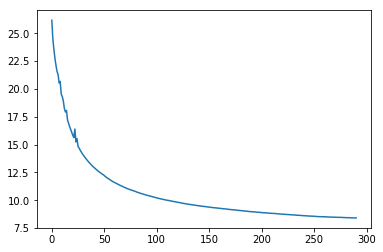

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [291] training...
  6%|▌         | 15/266 [00:00<00:01, 145.82it/s]

அரு                 	அஞ்சிமாறன்          	அந்தல்லி            	அன்புன்குன்றக்கோவன் 
அண்ணல்வல்லி         	அகரன்               	அகவல்லி             	அணிமுதற்பன்         
அல்வல்லி            	அன்                 	அங்கண்மல்           	அல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்
ஆம்பற்புனல்         	ஆற்றட்குழவரசு       	ஆற்றத்தம்           	ஆசைச்சிமன்னன்னன்    
ஆ                   	ஆற்றவழுதிர்         	ஆர்மடந்தை           	ஆவிருவண்ணன்         
ஆற்றன்மணி           	ஆளத்தவளவழுதி        	ஆயம்பல்             	ஆடலழகன்             
இயல்விறல்           	இளக்கடல்            	இலப்பமுத்தம்        	இன்பக்கோன்          
இயலரிதி             	இயற்செம்மல்         	இன்ன்மைன்புன்னை     	இறைக்கோவன்          
இரும்புனல்          	இன்பன்              	இன்வளரரசுடர்        	இளவரசு              
ஈழவரமுதம்           	ஈகைமுருகன்          	ஈன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்	ஈழத்தன்             
ஈகம்பரிதி           	ஈழத்தமிழத்தன்       	ஈகத்தழக்குன்றம்பல்  	ஈகன்                
ஈகக்குன்றம்புணை     	ஈகையன்       

100%|██████████| 266/266 [00:02<00:00, 108.51it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [291] training loss:8.40921401977539
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [292] training...
100%|██████████| 266/266 [00:02<00:00, 103.74it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [292] training loss:8.411827087402344
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [293] training...
100%|██████████| 266/266 [00:02<00:00, 111.22it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [293] training loss:8.399547576904297
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [294] training...
100%|██████████| 266/266 [00:02<00:00, 103.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [294] training loss:8.403852462768555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [295] training...
100%|██████████| 266/266 [00:02<00:00

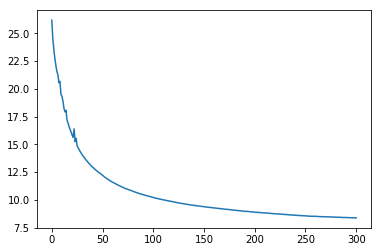

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [301] training...
  5%|▍         | 13/266 [00:00<00:02, 121.37it/s]

அகன்முத்து          	அகலப்பரியன்         	அம்புத்தித்தலைவயல்  	அகரசெற்குன்றக்கோவன் 
அகன்பம்மா           	அகன்                	அலையமுத்தமடந்தை     	அம்                 
அந்துணை             	அணி                 	அந்தன்முத்தம்       	அகரச்செந்தாழண்ணல்   
ஆர்வல்லாள்          	ஆயப்பரிதிரோன்       	ஆவைகை               	ஆழிக்குன்றன்        
ஆசைக்குமரியம்       	ஆளக்கதிர்           	ஆன்                 	ஆற்றுவிரியன்        
ஆளி                 	ஆத்திக்குமன்றன்     	ஆடலழகிள்ளை          	ஆன்ன்றுவன்பம்பி     
இறை                 	இனிவிழியன்          	இருகுன்ணை           	இளவளவழுதிர்         
இளர்                	இன்                 	இளங்கனி             	இத்திச்செம்மைத்திக்கோவன்
இரசத்திடையாள்       	இயற்பண்ணரசன்        	இசைக்குன்றம்        	இன்னன்              
ஈகைம்மை             	ஈகரிச்சுடர்வன்      	ஈரிகவிரியள்         	ஈகன்மையன்பு         
ஈகைச்சுங்குன்றைக்குன்றம்	ஈகையன்              	ஈழக்குமரிமங்கை      	ஈகவரசன்             
ஈகலரசி              	ஈழவழுதி             	ஈடலம்பொன்னி         	ஈகலப்

100%|██████████| 266/266 [00:02<00:00, 107.14it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [301] training loss:8.380207061767578
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [302] training...
100%|██████████| 266/266 [00:02<00:00, 102.07it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [302] training loss:8.373623847961426
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [303] training...
100%|██████████| 266/266 [00:02<00:00, 111.38it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [303] training loss:8.38011646270752
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [304] training...
100%|██████████| 266/266 [00:02<00:00, 102.17it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [304] training loss:8.371216773986816
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [305] training...
100%|██████████| 266/266 [00:02<00:00

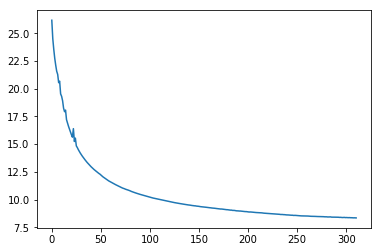

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [311] training...
  6%|▌         | 15/266 [00:00<00:01, 144.11it/s]

அலம்பறல்            	அம்மைம்புமுதன்      	அம்மாச்செல்வம்      	அன்னம்பி            
அவையரட்சிட்டு       	அகன்மைன்பரிதி       	அல்ன்னிக்குன்றம்    	அகன்சுடன்மருதன்     
அகந்தி              	அந்தகட்செஞ்சறிஞன்   	அண்ணக்குன்றம்       	அகல்வளத்தன்         
ஆற்றன்மன்றம்மா      	ஆரிதிறத்தன்         	ஆன்ன்ன்ன்றை         	ஆன்                 
ஆர்மன்றவடிவு        	ஆழித்திறவலன்        	ஆர்முதல்வில்        	ஆத்தஞ்சாரல்         
ஆற்றம்பம்           	ஆன்மைத்தம்பி        	ஆட்டுச்சிட்டு       	ஆண்ணரசன்            
இத்திச்செல்வம்      	இயினிக்கோமான்பு     	இ                   	இஞ்சன்              
இயதல்               	இயதம்               	இய்தலம்மை           	இஞ்சத்தம்பி         
இனிவுப்புதுமலை      	இயங்கவியவரசன்       	இன்பரிதிங்கை        	இன்குமலைமுடிவேங்கை  
ஈல்ன்முல்லை         	ஈகற்செந்தென்றக்கண்ணன்	ஈழவரண்ணி            	ஈகக்கதிர்           
ஈண்குன்மன்றல்       	ஈகப்பப்பிரசன்       	ஈழமுதல்வில்         	ஈகன்புலன்           
ஈகக்குமரமுதன்மடந்தை 	ஈழக்கதிர்           	ஈழப்புலமை           	ஈகைத்தம்பி  

100%|██████████| 266/266 [00:02<00:00, 107.70it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [311] training loss:8.349124908447266
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [312] training...
100%|██████████| 266/266 [00:02<00:00, 83.75it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [312] training loss:8.350801467895508
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [313] training...
100%|██████████| 266/266 [00:02<00:00, 108.45it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [313] training loss:8.339101791381836
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [314] training...
100%|██████████| 266/266 [00:02<00:00, 109.09it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [314] training loss:8.34861946105957
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [315] training...
100%|██████████| 266/266 [00:02<00:00

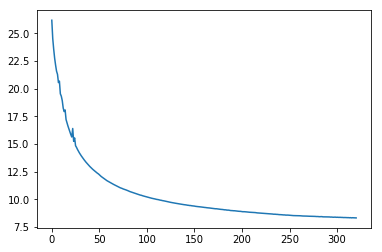

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [321] training...
  6%|▌         | 15/266 [00:00<00:01, 145.77it/s]

அகதல்வில்           	அல்வையறி            	அகவளக்கயம்          	அரிகனனம்பி          
அலையரசி             	அகலக்கண்ணன்         	அரசத்தாய்           	அருவன்              
அணிகைப்புகழ்        	அருமைத்திக்கதிர்    	அகவம்பு             	அன்பின்பன்          
ஆ                   	ஆற்ற்கக்கண்ற்ன்பரிதிரோன்	ஆன்பிச்சிட்டு       	ஆசைக்குன்றை         
ஆற்றம்பல்           	ஆர்                 	ஆத்தித்தமிழ்        	ஆரித்துறைவன்        
ஆல்விளரசி           	ஆத்மத்தெத்தக்கடலன்  	ஆழியரசல்            	ஆம்பல்லோன்          
இளக்குன்றம்பு       	இஞ்சமருதன்          	இன்புன்முத்தம்மை    	இன்பன்              
இ                   	இன்பவழுதிரு         	இணக்கயம்            	இன்                 
இயற்கனற்செல்லம்பு   	இன்குன்றை           	இன்பரிதி            	இருல்கண்முத்தன்     
ஈகைவிறலமை           	ஈகைமுதன்பன்         	ஈகைச்சின்மன்றம்     	ஈகைக்கதிர்          
ஈழல்                	ஈழக்கிழான்          	ஈழக்கயல்            	ஈகவண்ணகன்           
ஈழவப்புப்புப்பிள்ளை 	ஈடன்                	ஈகையன்              	ஈகைக்கனல்

100%|██████████| 266/266 [00:02<00:00, 106.76it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [321] training loss:8.323993682861328
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [322] training...
100%|██████████| 266/266 [00:02<00:00, 112.29it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [322] training loss:8.31828784942627
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [323] training...
100%|██████████| 266/266 [00:02<00:00, 106.95it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [323] training loss:8.312527656555176
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [324] training...
100%|██████████| 266/266 [00:02<00:00, 109.34it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [324] training loss:8.309418678283691
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [325] training...
100%|██████████| 266/266 [00:02<00:00

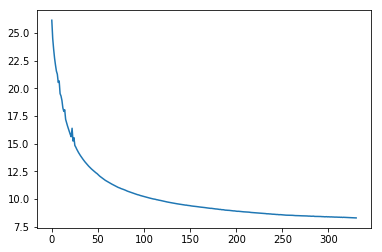

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [331] training...
  6%|▌         | 15/266 [00:00<00:01, 145.74it/s]

அரு                 	அல்                 	அலை                 	அணி                 
அணிகைக்குயில்       	அமையரியவன்          	அடலன்மடந்தை         	அகவுமலை             
அம்மை               	அன்பன்              	அமர்த்துறை          	அரசமல்லன்           
ஆரப்புத்திகை        	ஆர்வல்லைவழுதி       	ஆயற்பரிதி           	ஆற்றண்முத்தழவன்பு   
ஆயற்சிட்டு          	ஆட்சிமன்            	ஆத்திங்கம்பு        	ஆன்வற்றவவளவழுதிர்   
ஆட்டுமருதம்         	ஆற்றகவளத்தவளவழுதிர் 	ஆர்                 	ஆசை                 
இருத்தமிழ்          	இன்னெற்சுடரம்       	இளன்பம்மை           	இலவுச்சுடன்பன்      
இன்மலர்             	இலர்முத்தன்         	இருத்தலைவயல்        	இன்பரிதி            
இ                   	இன்மலையன்           	இன்பம்மை            	இறைச்சின்முத்தன்    
ஈகரியற்பரிதி        	ஈகைச்சிச்சி         	ஈகைக்குமடந்தை       	ஈடற்செற்செந்தாறிளக்கண்ணன்
ஈகன்மடந்தை          	ஈகை                 	ஈகக்குன்றம்பு       	ஈல்                 
ஈம்புவியட்சிட்டு    	ஈழத்தழகன்           	ஈல்வல்லி            	ஈகத்தழகன

100%|██████████| 266/266 [00:02<00:00, 92.15it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [331] training loss:8.290520668029785
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [332] training...
100%|██████████| 266/266 [00:02<00:00, 111.73it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [332] training loss:8.280295372009277
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [333] training...
100%|██████████| 266/266 [00:02<00:00, 105.33it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [333] training loss:8.290613174438477
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [334] training...
100%|██████████| 266/266 [00:02<00:00, 111.42it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [334] training loss:8.283537864685059
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [335] training...
100%|██████████| 266/266 [00:02<00:0

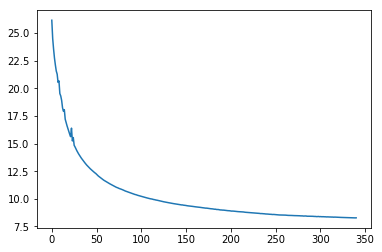

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [341] training...
  6%|▌         | 15/266 [00:00<00:01, 146.57it/s]

அம்மான்மன்றம்மா     	அரிரின்குன்றைமுறை   	அருன்மயில்          	அரசி                
அன்ன்மைன்னை         	அ                   	அருட்புக்கனி        	அன்                 
அள்ளை               	அன்னின்             	அணரப்புலமை          	அன்ன்குன்றவழுதி     
ஆர்வன்மன்றை         	ஆல்                 	ஆற்றள்வடிவு         	ஆர்                 
ஆழிக்கடல்           	ஆர்மைந்தன்          	ஆளியரசு             	ஆய்ரினியன்          
ஆற்றிதரப்பரிதி      	ஆர்வண்ணவேந்தனவரசன்  	ஆற்ற்செம்பல்லப்புலமை	ஆடலரசு              
இன்னெறிப்புதுத்தேவி 	இயற்பன்             	இன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்ன்	இருவத்தவளவழுதிறன்   
இன்பக்கயம்          	இலக்கோவன்           	இணர்வல்லி           	இன்வன்வளவழுதி       
இ                   	இன்பரிதி            	இறியலரி             	இளந்தனம்            
ஈன்மன்ன்மன்றன்மயிற்றல்	ஈகை                 	ஈழத்தலைவள்          	ஈகைமைந்தன்          
ஈகைச்சின்மங்கை      	ஈகைமாரினியன்பு      	ஈல்வி               	ஈகத்தம்பி           
ஈழர்தகை             	ஈக                  	ஈகைக்குயில்

100%|██████████| 266/266 [00:02<00:00, 112.79it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [341] training loss:8.265898704528809
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [342] training...
100%|██████████| 266/266 [00:02<00:00, 110.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [342] training loss:8.254485130310059
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [343] training...
100%|██████████| 266/266 [00:02<00:00, 110.12it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [343] training loss:8.254642486572266
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [344] training...
100%|██████████| 266/266 [00:02<00:00, 107.69it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [344] training loss:8.253697395324707
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [345] training...
100%|██████████| 266/266 [00:02<00:0

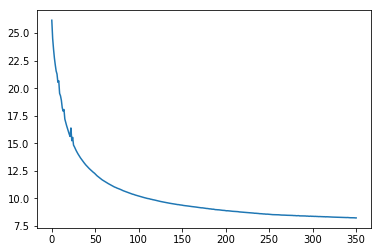

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [351] training...
  6%|▌         | 15/266 [00:00<00:01, 140.06it/s]

அலரிலவு             	அன்                 	அம்ம்புலக்குன்றம்   	அருமைக்கோவன்        
அகத்தமிமடந்தை       	அன்வன்பன்           	அறதன்மடந்தை         	அணிகுன்றக்குன்றக்கோவன்
அலர்கலை             	அன்புத்தலைவழுதிர்   	அந்தகை              	அருற்குன்றவழுதி     
ஆழிச்செல்வன்        	ஆ                   	ஆர்மடந்தை           	ஆற்கடல்             
ஆற்றின்ன்மன்றம்மா   	ஆர்வைகண்ணல்         	ஆல்                 	ஆட்சித்தன்          
ஆற்றற்செல்வம்       	ஆழிலன்பன்           	ஆடலம்மாவி           	ஆற்றை               
இசைவல்லி            	இல்                 	இளக்குன்றம்         	இன்                 
இந்தமிழ்வி          	இணம்பன்             	இத்தத்தலைவிழி       	இளவண்ணகன்           
இத்திச்சென்முத்துமலர்	இன்கண்ணாண்பண்ணன்    	இருங்கயம்           	இறைச்சுடம்பி        
ஈழவப்புனல்          	ஈழன்மாறன்           	ஈகரிலக்கனி          	ஈகை                 
ஈகக்குமரிக்குன்றம்பு	ஈகைச்சின்முறுவண்ணன் 	ஈகைச்செல்லம்பறல்    	ஈழ்வவவரசன்          
ஈல்                 	ஈர்முத்தன்          	ஈழவல்வல்லாள்        	ஈகைப்புத்த

100%|██████████| 266/266 [00:02<00:00, 110.57it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [351] training loss:8.237915992736816
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [352] training...
100%|██████████| 266/266 [00:02<00:00, 110.84it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [352] training loss:8.234092712402344
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [353] training...
100%|██████████| 266/266 [00:02<00:00, 108.03it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [353] training loss:8.24074935913086
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [354] training...
100%|██████████| 266/266 [00:02<00:00, 109.92it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [354] training loss:8.23452091217041
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [355] training...
100%|██████████| 266/266 [00:02<00:00,

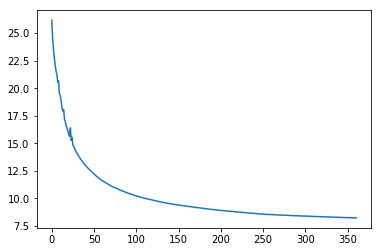

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [361] training...
  6%|▌         | 15/266 [00:00<00:01, 141.53it/s]

அகத்தமிழ்           	அருமைக்கண்ணல்       	அடர்                	அன்                 
அணி                 	அல்ட்கடல்           	அகன்பிறை            	அரியலவன்            
அம்மான்பம்          	அகல்பன்பரிதிரை      	அன்பக்குன்றம்       	அகரஞ்சான்           
ஆயற்செல்வம்         	ஆர்வலவன்            	ஆற்சின்மயில்        	ஆட்சித்துறை         
ஆடற்கடல்            	ஆற்செல்லமுதன்       	ஆர்மைமை             	ஆம்புகழ்விழியன்     
ஆர்கடலழகி           	ஆழியன்              	ஆழியன்முத்து        	ஆற்றலவன்            
இளன்பம்             	இன்பன்றை            	இரும்புலழகி         	இளந்தகவரசன்         
இருவல்லி            	இயற்செல்வரசன்       	இணர்மலர்            	இரல்லோவையன்         
இய்வத்தமிழ்மலை      	இளவளவளவன்           	இணர்க்குன்றம்       	இஞ்சத்தமிழ்         
ஈகளக்கனி            	ஈகைக்கோவன்          	ஈழமையரசி            	ஈகைச்செல்லமுதன்     
ஈகவளக்கனி           	ஈகவளவழுதிர்         	ஈகைவிறலழகி          	ஈழமுருகு            
ஈகைன்               	ஈணைவழுதி            	ஈகவல்லாள்           	ஈகை          

100%|██████████| 266/266 [00:02<00:00, 106.18it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [361] training loss:8.2191743850708
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [362] training...
100%|██████████| 266/266 [00:02<00:00, 105.25it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [362] training loss:8.215068817138672
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [363] training...
100%|██████████| 266/266 [00:02<00:00, 114.57it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [363] training loss:8.205802917480469
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [364] training...
100%|██████████| 266/266 [00:02<00:00, 111.74it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [364] training loss:8.210038185119629
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [365] training...
100%|██████████| 266/266 [00:02<00:00,

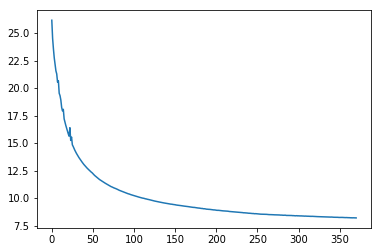

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [371] training...
  6%|▌         | 15/266 [00:00<00:01, 140.73it/s]

அத்ட்டற்செல்வம்     	அம்மால்             	அம்பிறைவி           	அஞ்சிலம்பரிதிரை     
அன்பின்பம்மை        	அணி                 	அன்                 	அடன்                
அணிணிமருதம்         	அன்ன்ன்ன்ல்ன்ல்ன்ல்ன்ல்ன்ன்ல்ன்ன்ன்ன்ன்ன்	அகலறிவு             	அம்புச்செல்வன்      
ஆழிச்சிச்சிச்சிச்சிக்குன்றம்	ஆய்யவழகன்           	ஆடலம்மாவி           	ஆர்மைந்தன்          
ஆற்றத்தழகு          	ஆற்செற்செற்செற்செற்சென்னன்னன்	ஆக்கயம்மா           	ஆடலரிமதி            
ஆற்றன்பம்           	ஆர்மைந்தன்          	ஆயட்டுமயில்         	ஆ                   
இன்வருந்தி          	இசையினியன்          	இஞ்சமடலழகி          	இன்றன்முத்தன்       
இந்தலம்மை           	இன்                 	இனிவிழியம்மாவி      	இயச்சேந்தன்         
இளங்கரசு            	இசையற்கண்பண்பன்     	இன்பிள்             	இஞ்சத்தம்பி         
ஈல்                 	ஈகைமுரசறை           	ஈழக்கடல்            	ஈழச்செந்தகண்பண்ணல்  
ஈழமலர்              	ஈழக்கண்ணன்          	ஈகரின்பம்           	ஈகைவளத்தன்          
ஈகரசு               	ஈகையறிஞன்        

100%|██████████| 266/266 [00:02<00:00, 107.73it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [371] training loss:8.192181587219238
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [372] training...
100%|██████████| 266/266 [00:02<00:00, 106.74it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [372] training loss:8.184647560119629
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [373] training...
100%|██████████| 266/266 [00:02<00:00, 108.96it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [373] training loss:8.182239532470703
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [374] training...
100%|██████████| 266/266 [00:02<00:00, 106.38it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [374] training loss:8.182095527648926
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [375] training...
100%|██████████| 266/266 [00:02<00:0

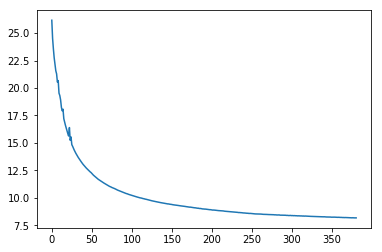

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [381] training...
  5%|▍         | 13/266 [00:00<00:01, 127.37it/s]

அணிலக்குமரி         	அருகன்              	அருவள்              	அவையிவன்            
அணை                 	அரலவன்              	அன்டன்றை            	அத்தன்              
அல்லியழகி           	அரல்வையறிவுமுதன்    	அந்திருவல்லி        	அரற்செல்வரசன்       
ஆண்குன்றன்மடந்தை    	ஆக்கன்              	ஆற்றற்செல்லம்பு     	ஆர்குழவளவன்         
ஆளிவல்லம்பு         	ஆய்வல்லோன்          	ஆர்வல்லப்புலமை      	ஆழிச்செல்வளத்தன்    
ஆசைக்குமரி          	ஆர்வக்கிழான்        	ஆத்தித்தலைப்பொழில்  	ஆ                   
இயினிக்குமரிக்குயில்	இன்பன்              	இருவரண்ணி           	இள                  
இலக்குறித்தலையழகி   	இணவளவன்             	இதன்மங்கை           	இணர்வண்ணல்          
இளங்கடலழகி          	இன்னற்பரிதி         	இருங்கள்            	இ                   
ஈகல்வளக்கு          	ஈன்                 	ஈகை                 	ஈகைத்தலையன்         
ஈழன்மங்கையள்        	ஈககலித்தெத்தழகவன்   	ஈடத்தலைவல்லி        	ஈலக்கோன்            
ஈகவல்லாள்           	ஈகலன்               	ஈழக்கடலரசி          	ஈகை          

100%|██████████| 266/266 [00:02<00:00, 104.79it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [381] training loss:8.167277336120605
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [382] training...
100%|██████████| 266/266 [00:02<00:00, 115.99it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [382] training loss:8.161524772644043
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [383] training...
100%|██████████| 266/266 [00:02<00:00, 118.52it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [383] training loss:8.160514831542969
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [384] training...
100%|██████████| 266/266 [00:02<00:00, 96.46it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [384] training loss:8.157466888427734
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [385] training...
100%|██████████| 266/266 [00:02<00:0

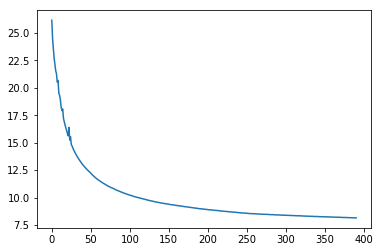

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [391] training...
  6%|▌         | 15/266 [00:00<00:01, 137.61it/s]

அணிகையம்மை          	அன்                 	அன்பன்றை            	அன்புக்கோவன்        
அறவப்புலமை          	அன்                 	அகன்                	அகன்பின்முத்தன்     
அருள்               	அல்விறல்            	அரட்டரசி            	அகரவில்வன்          
ஆத்தத்தழகிலி        	ஆற்றிஞ்சத்தன்       	ஆய்                 	ஆளி                 
ஆழியமுதம்           	ஆளி                 	ஆய்கைக்குன்றம்பரிதி 	ஆம்பன்              
ஆலப்பழம்            	ஆழகக்கோவன்          	ஆய்ங்கையழகி         	ஆம்பரிதிவளவழுதி     
இருமைக்குமரியள்     	இறையஞ்சன்           	இளக்குமயிற்சென்மயிற்கடல்	இன்பன்              
இயலருவி             	இன்னென்றன்மன்னன்    	இர்விரி             	இல்வண்ணகன்பு        
இளங்கள்             	இன்மறவழுதி          	இறைமைக்குன்றைக்குமன்றன்மடந்தை	இத்தக்கதிர்         
ஈகைக்கடல்           	ஈழத்தமையரசன்        	ஈழவளக்கலை           	ஈகத்தம்பி           
ஈகன்ற்ன்றைக்குன்றன் 	ஈகச்செல்வளத்தன்     	ஈகச்சிச்சிட்டு      	ஈகக்குமரன்          
ஈருவவல்லி           	ஈகலின்பன்பன்        	ஈகைக்குமரி          	

100%|██████████| 266/266 [00:02<00:00, 89.89it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [391] training loss:8.145682334899902
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [392] training...
100%|██████████| 266/266 [00:02<00:00, 111.77it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [392] training loss:8.14599323272705
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [393] training...
100%|██████████| 266/266 [00:02<00:00, 118.21it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [393] training loss:8.135839462280273
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [394] training...
100%|██████████| 266/266 [00:02<00:00, 104.17it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [394] training loss:8.137516975402832
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [395] training...
100%|██████████| 266/266 [00:02<00:00

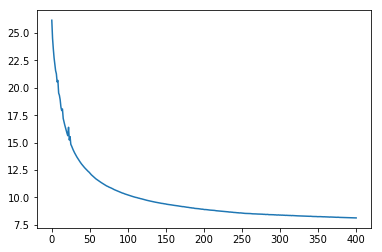

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [401] training...
  5%|▌         | 14/266 [00:00<00:01, 131.98it/s]

அ                   	அரட்சிவன்           	அம்மை               	அரியரசன்            
அணின்புன்மயில்      	அணிமுத்தெனினியழகு   	அகரக்குன்றம்        	அரின்பம்பி          
அன்டன்மடந்தை        	அமர்க்கதிர்         	அருளத்தம்           	அன்                 
ஆன்னின்             	ஆம்பிசை             	ஆழியன்னை            	ஆத்தியன்            
ஆத்தப்புத்துணை      	ஆழிழியற்புலவன்      	ஆற்க்குமரஞ்சள்      	ஆழிலன்              
ஆரியம்              	ஆ                   	ஆசை                 	ஆட்டுவண்ணன்         
இஞ்சள்ளி            	இல்வையண்ணண்ணன்      	இன்                 	இன்பரியன்           
இயிலம்மை            	இசைத்தலைவழுதி       	இன்                 	இளம்மலன்            
இயிற்செற்செற்செற்செல்வல்லி	இஞ்சன்              	இண்ணன்மான்          	இன்பரிதியன்         
ஈகைமுல்லை           	ஈங்கள்ளரசு          	ஈகற்கற்செற்செழுமயிற்கயல்	ஈழமுத்தன்           
ஈழம்பகலம்           	ஈழவளவளவழுதி         	ஈண்சி               	ஈழமுதன்             
ஈண்குன்றச்சிட்டு    	ஈகை                 	ஈழலண்கயல்           	ஈகை

100%|██████████| 266/266 [00:02<00:00, 106.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [401] training loss:8.12282657623291
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [402] training...
100%|██████████| 266/266 [00:02<00:00, 111.17it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [402] training loss:8.10931396484375
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [403] training...
100%|██████████| 266/266 [00:02<00:00, 105.96it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [403] training loss:8.121142387390137
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [404] training...
100%|██████████| 266/266 [00:02<00:00, 108.68it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [404] training loss:8.11378002166748
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [405] training...
100%|██████████| 266/266 [00:02<00:00, 

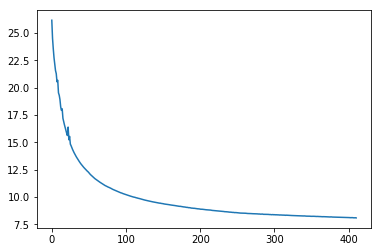

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [411] training...
  4%|▍         | 10/266 [00:00<00:02, 94.10it/s]

அடள்                	அஞ்ண்டி             	அன்ன்ன்ன்ன்ன்ன்றை   	அரப்பரிதி           
அந்தமிழ்வி          	அடந்தைக்கதிர்       	அவையரசி             	அன்புக்கோவன்        
அகக்கயல்            	அஞ்சிவண்ணல்         	அகன்                	அன்புக்குன்றை       
ஆழியழகி             	ஆண்பறவோன்பன்        	ஆரிவலமையணி          	ஆழித்தன்            
ஆங்கண்மல்           	ஆற்றுமைக்குன்றன்    	ஆ                   	ஆள்                 
ஆம்பல்வல்லி         	ஆல்                 	ஆன்                 	ஆத்தித்தவரசு        
இ                   	இன்பன்              	இய்தகை              	இரி                 
இரட்சியள்           	இங்குமுத்தழகன்      	இருங்கயல்           	இருல்வரசன்          
இயற்சிட்டு          	இன்                 	இருதரப்புலமை        	இறைமுறைமுறைமுத்தன்  
ஈகக்குன்றம்         	ஈகலவன்              	ஈன்ன்பின்பம்மை      	ஈகற்செம்மன்னன்      
ஈழம்மை              	ஈகை                 	ஈகை                 	ஈண்பறவன்பு          
ஈண்குரிமுதல்வி      	ஈகைச்சிமுத்தரசு     	ஈழமலர்              	ஈகை          

100%|██████████| 266/266 [00:02<00:00, 107.85it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [411] training loss:8.094435691833496
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [412] training...
100%|██████████| 266/266 [00:02<00:00, 98.01it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [412] training loss:8.09883975982666
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [413] training...
100%|██████████| 266/266 [00:02<00:00, 107.07it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [413] training loss:8.106245040893555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [414] training...
100%|██████████| 266/266 [00:02<00:00, 106.04it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [414] training loss:8.09084701538086
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [415] training...
100%|██████████| 266/266 [00:02<00:00,

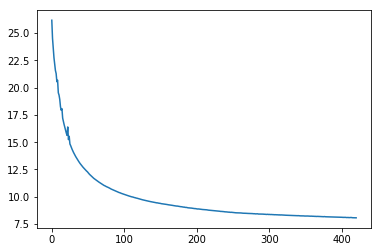

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [421] training...
  6%|▌         | 15/266 [00:00<00:01, 140.31it/s]

அம்ம்புகழழம்        	அல்வைமருதன்         	அலைவி               	அறவழுதிறன்          
அல்விளக்கு          	அம்மானியண்ணல்       	அல்லியன்            	அகன்                
அந்தலரசி            	அடலன்               	அங்கற்செல்வளக்கலை   	அணிகைன்குன்றன்      
ஆய்யல்விறலள்        	ஆர்வண்ணலோவையன்      	ஆம்புலக்கடல்        	ஆளியோன்             
ஆழியலையழகி          	ஆற்றத்தம்பி         	ஆழிலமங்கை           	ஆர்தி               
ஆற்செல்வம்          	ஆல்                 	ஆர்விரியம்          	ஆய்த்தவவன்          
இய்யமுதல்வி         	இளஞ்சன்             	இன்றலம்மை           	இளங்கிள்ளி          
இணகயவல்             	இன்கனிலவன்          	இறையற்செல்வல்லி     	இனினினியன்பு        
இன்                 	இன்னன்னன்           	இறைக்குன்றன்        	இருல்லண்முத்தன்     
ஈகைச்சிச்சிக்குயில் 	ஈகப்பொழிலன்         	ஈழங்கயம்            	ஈகன்                
ஈரியழகி             	ஈழக்கடல்            	ஈகவளக்கலை           	ஈகைமைந்தன்          
ஈகம்பி              	ஈகை                 	ஈகல்வெற்றல்லி       	ஈகைக்கோவன்பு 

100%|██████████| 266/266 [00:02<00:00, 111.85it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [421] training loss:8.08253002166748
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [422] training...
100%|██████████| 266/266 [00:02<00:00, 114.11it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [422] training loss:8.070550918579102
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [423] training...
100%|██████████| 266/266 [00:02<00:00, 114.75it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [423] training loss:8.063769340515137
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [424] training...
100%|██████████| 266/266 [00:02<00:00, 104.81it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [424] training loss:8.067801475524902
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [425] training...
100%|██████████| 266/266 [00:02<00:00

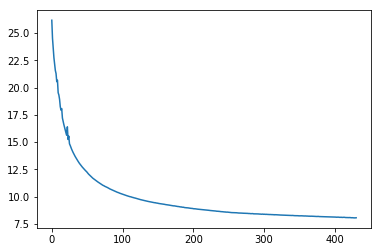

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [431] training...
  6%|▌         | 15/266 [00:00<00:01, 145.77it/s]

அகல்விளம்           	அறவவன்              	அருதங்கை            	அ                   
அல்லின்பம்மை        	அன்னிவிறலோன்        	அறவக்கயல்           	அலைவல்லோன்          
அம்ம்புதுமதி        	அரிரினிவியரசன்      	அரிக்கனல்           	அண்ணச்செல்வரசன்     
ஆர்                 	ஆற்றலவன்            	ஆற்றித்தலைப்புலமை   	ஆட்சிமலை            
ஆற்றைக்குமன்றன்மடந்தை	ஆழியரசன்            	ஆழியன்முத்தம்       	ஆட்சியன்            
ஆயிச்செல்வம்        	ஆரியண்ணல்           	ஆழிச்சிலம்பு        	ஆர்வண்ணர்           
இயலழகி              	இருனின்பரிதி        	இயற்செல்வில்        	இளன்பன்             
இடன்ன்பரிதி         	இர்வவவவவவளவண்ணகவழுதி	இன்மயில்            	இன்னெழின்மலவன்      
இருட்சிட்டு         	இளமன்னன்            	இன்                 	இளவளவளவன்           
ஈகமுத்தம்மை         	ஈழத்மையரினியழகன்    	ஈகைச்சிச்சிட்டு     	ஈழத்துறைவன்         
ஈகைக்கலை            	ஈழவளவரசன்           	ஈழ்ச்சிக்குயில்     	ஈழற்சீரன்           
ஈழக்கடலரசி          	ஈகைமை               	ஈல்ன்மன்றை          	ஈகன்றன்பரிதி

100%|██████████| 266/266 [00:02<00:00, 109.61it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [431] training loss:8.050518035888672
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [432] training...
100%|██████████| 266/266 [00:02<00:00, 114.16it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [432] training loss:8.04992961883545
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [433] training...
100%|██████████| 266/266 [00:02<00:00, 110.03it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [433] training loss:8.04541301727295
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [434] training...
100%|██████████| 266/266 [00:02<00:00, 114.45it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [434] training loss:8.049434661865234
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [435] training...
100%|██████████| 266/266 [00:02<00:00,

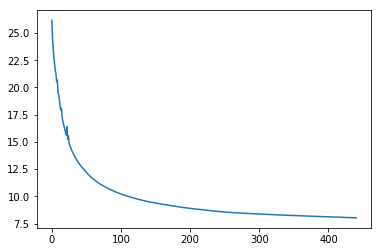

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [441] training...
  6%|▌         | 15/266 [00:00<00:01, 142.41it/s]

அருலித்திறக்கயம்    	அணியன்              	அலையரசி             	அரிதிக்குன்றம்பி    
அன்புன்பம்          	அண்ணமுத்தன்         	அல்லம்புணை          	அணிகைமணி            
அணிவல்லள்           	அடலழகு              	அன்ன்ன்மைன்மைன்னையல்வானம்	அகத்தெண்வளக்கண்ணர்  
ஆயற்செல்வப்புலமை    	ஆடலவவன்             	ஆம்மையமுதல்வி       	ஆர்வவளவழுதி         
ஆத்தத்தலைமலர்       	ஆட்டி               	ஆளக்கலைவி           	ஆட்சுடரோன்          
ஆ                   	ஆத்தித்தி           	ஆழியழகி             	ஆற்று               
இந்தலம்மை           	இலங்கனல்            	இளவப்பி             	இறைத்தலைவழுதி       
இண்ணக்கடலரி         	இருஞ்சாரல்லோன்      	இத்தித்தலைவல்       	இர்விரசன்           
இத்தத்தலைவல்        	இசைச்செந்தாறிண்ணாண்பல்லோன்	இணங்கடல்            	இகரைவிறலோன்         
ஈகைச்சுடம்மை        	ஈகக்குன்றக்குன்றக்கதிர்	ஈழக்கயல்            	ஈடந்தென்னன்         
ஈழம்புமுதம்மை       	ஈழந்தாம்பரிதி       	ஈகரின்புலமுதம்      	ஈழமுத்தன்           
ஈழப்புலக்கனி        	ஈகவன்               	ஈழக்கயல்            

100%|██████████| 266/266 [00:02<00:00, 110.12it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [441] training loss:8.020026206970215
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [442] training...
100%|██████████| 266/266 [00:02<00:00, 112.18it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [442] training loss:8.023136138916016
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [443] training...
100%|██████████| 266/266 [00:02<00:00, 106.63it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [443] training loss:8.023566246032715
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [444] training...
100%|██████████| 266/266 [00:02<00:00, 88.51it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [444] training loss:8.02145004272461
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [445] training...
100%|██████████| 266/266 [00:02<00:00

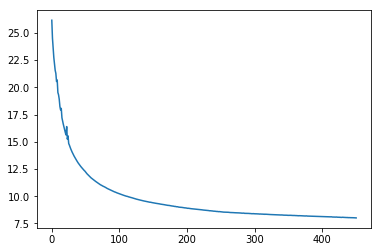

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [451] training...
  5%|▍         | 12/266 [00:00<00:02, 110.66it/s]

அரிதி               	அகத்துறைவழுதி       	அம்பற்செல்வம்       	அகத்தென்றல்         
அவைமடந்தை           	அகத்தவரசு           	அகக்குமயிற்சென்முத்துக்கயல்	அம்மாவன்            
அகரக்குறிஞ்சி       	அன்சுடன்            	அ                   	அன்வரசன்            
ஆயப்புத்தழகு        	ஆர்வப்பன்           	ஆற்றள்ற்சுடன்மன்றம் 	ஆசைமல்லன்           
ஆய்வல்லி            	ஆழித்திறல்          	ஆட்டியழகி           	ஆய்வமலர்            
ஆற்றலினியம்         	ஆன்றன்மன்னன்        	ஆற்றமுதம்           	ஆர்வவளவரசு          
இன்பம்மை            	இஞ்சரசன்            	இ                   	இறைவளவரசு           
இழகிள்ளை            	இயலவரசு             	இயற்செல்வல்லி       	இளஞ்சாரல்           
இரியம்மா            	இங்கண்முத்தன்       	இன்னிவிழியள்        	இருற்கூத்தன்        
ஈகையணி              	ஈகவரசு              	ஈடர்                	ஈர்கண்ள்ள்          
ஈரிசிலம்பல்         	ஈகையறிஞன்           	ஈகைத்தங்கை          	ஈகை                 
ஈகைக்குமரி          	ஈகை                 	ஈகை                 	ஈகை   

100%|██████████| 266/266 [00:02<00:00, 111.72it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [451] training loss:8.001020431518555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [452] training...
100%|██████████| 266/266 [00:02<00:00, 102.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [452] training loss:7.989901542663574
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [453] training...
100%|██████████| 266/266 [00:02<00:00, 110.95it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [453] training loss:7.998355865478516
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [454] training...
100%|██████████| 266/266 [00:02<00:00, 109.48it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [454] training loss:7.987044334411621
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [455] training...
100%|██████████| 266/266 [00:02<00:0

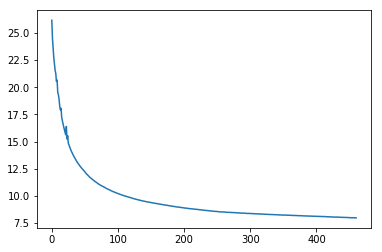

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [461] training...
  6%|▌         | 15/266 [00:00<00:01, 138.48it/s]

அத்த்தக்குன்றக்குன்றம்	அஞ்செல்வன்          	அரு                 	அம்                 
அடல்வளக்குன்றம்     	அன்மைக்குன்றம்பி    	அகம்                	அகக்கடன்            
அம்மா               	அரியலரியழகன்        	அத்தவரசி            	அம்மலையன்           
ஆமையரியம்           	ஆட்டி               	ஆட்டியவல்லி         	ஆற்றவன்             
ஆர்க்கலம்           	ஆககச்சென்னன்        	ஆயச்சிட்டு          	ஆற்செற்செற்செற்செல்வளவன்
ஆ                   	ஆத்திச்சென்னன்      	ஆழிக்குறிஞ்சிட்டு   	ஆளமுதன்             
இயற்செல்வி          	இழுக்குன்றக்குன்றம்பொழில்	இஞ்சத்திமலர்        	இருஞ்சிக்கோவன்      
இன்பரிதி            	இயலன்றி             	இன்பன்ந்தகை         	இழிலன்பன்           
இகைம்மை             	இஞ்சறிஞன்           	இயிவிளக்கு          	இரி                 
ஈகரியள்             	ஈகை                 	ஈகை                 	ஈன்ன்றுன்சு         
ஈழ                  	ஈழமருதன்            	ஈகை                 	ஈகழண்பண்ணல்லோன்     
ஈகைத்தமிழ்          	ஈழத்தகையன்          	ஈகை                 	ஈட

100%|██████████| 266/266 [00:02<00:00, 104.08it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [461] training loss:7.977291584014893
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [462] training...
100%|██████████| 266/266 [00:02<00:00, 109.24it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [462] training loss:7.983099460601807
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [463] training...
100%|██████████| 266/266 [00:02<00:00, 106.37it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [463] training loss:7.977275371551514
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [464] training...
100%|██████████| 266/266 [00:02<00:00, 107.41it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [464] training loss:7.982332706451416
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [465] training...
100%|██████████| 266/266 [00:02<00:0

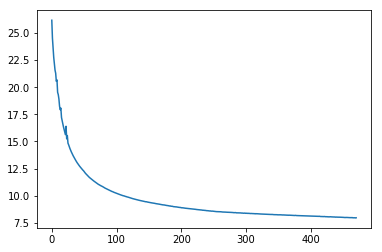

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [471] training...
  5%|▍         | 12/266 [00:00<00:02, 114.72it/s]

அகம்மை              	அவைவத்துரை          	அன்ன்ன்             	அரசத்தன்            
அகரியம்மா           	அகரமுதல்வன்         	அம்புன்மடந்தை       	அந்க்குமறவழுதிருவன் 
அம்பிறைவி           	அவைக்குமன்றின்குன்றவன்	அவிர்விரியம்மை      	அரிரினினியறிவுமுருகன்
ஆன்                 	ஆழனியன்             	ஆட்சிலம்பு          	ஆல்ர்குசிவப்பிமுத்து
ஆழிவிற்புனல்        	ஆல்                 	ஆன்பிள்             	ஆற்றண்ணலவன்         
ஆயலையலைமங்கை        	ஆரஞ்சன்             	ஆழிற்செல்வல்லி      	ஆடலழகன்             
இன்ன்மைச்சின்மயில்  	இய்யப்பரியன்        	இருங்கயம்           	இருல்லவன்           
இளமடந்தை            	இயற்பன்             	இத்தித்தலைவயல்      	இசையற்பு            
இத்தல்              	இன்வளத்தன்          	இளக்குமரி           	இன்றன்கண்ணலவன்      
ஈகைம்மருதம்         	ஈகைன்னையன்பு        	ஈகையமுதம்           	ஈகைமைமைந்தன்        
ஈழக்குன்றம்மா       	ஈரிதி               	ஈகைக்குறிஞ்சியணி    	ஈகைத்துத்தழன்       
ஈகலம்               	ஈகரினியழகு          	ஈகவளக்கலை           	ஈகைப்பு   

100%|██████████| 266/266 [00:02<00:00, 111.92it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [471] training loss:7.962663173675537
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [472] training...
100%|██████████| 266/266 [00:02<00:00, 119.23it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [472] training loss:7.957983016967773
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [473] training...
100%|██████████| 266/266 [00:02<00:00, 118.82it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [473] training loss:7.954113483428955
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [474] training...
100%|██████████| 266/266 [00:02<00:00, 119.26it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [474] training loss:7.956758499145508
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [475] training...
100%|██████████| 266/266 [00:02<00:0

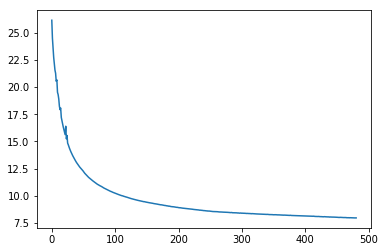

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [481] training...
  5%|▌         | 14/266 [00:00<00:01, 137.63it/s]

அலந்தவரசி           	அகம்பகச்சுடர்க்கோவன்	அறலவல்              	அகர்வவன்            
அம்புன்மடந்தை       	அஞ்சிலம்பி          	அந்தன்மயில்         	அருலவரசன்           
அறகவல்லி            	அருமைக்கடல்         	அன்புக்கயம்         	அம்                 
ஆத்திப்புலமை        	ஆட்டலவரவன்பன்       	ஆன்                 	ஆன்                 
ஆர்மையரசி           	ஆழில்கண்ணல்         	ஆயல்விறல்           	ஆத்திறலோவை          
ஆற்றற்றற்செந்தமிழ்  	ஆர்மைமைமுடிவேங்கை   	ஆண்மருதம்           	ஆளப்பன்             
இன்                 	இளவழவரசு            	இளங்குன்றம்புன்பம்மை	இடி                 
இட்டன்மடந்தை        	இயலவவன்             	இங்கயம்மை           	இண்                 
இருஞ்சாரல்          	இரனஞ்சன்            	இருற்குன்றம்பு      	இளவளவன்             
ஈகன்மைக்குன்றம்     	ஈகை                 	ஈகலரசன்             	ஈகைத்தம்பி          
ஈகை                 	ஈகை                 	ஈழச்சிக்குன்றம்     	ஈண்புக்குன்றக்கதிர் 
ஈம்பரிதியல்         	ஈகற்ற்செந்தகண்பண்ணன்	ஈழங்கற்செல்வளக்கிளி 	ஈடமுத்தன்    

100%|██████████| 266/266 [00:02<00:00, 109.61it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [481] training loss:7.945842742919922
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [482] training...
100%|██████████| 266/266 [00:02<00:00, 106.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [482] training loss:7.939675331115723
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [483] training...
100%|██████████| 266/266 [00:02<00:00, 106.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [483] training loss:7.961963176727295
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [484] training...
100%|██████████| 266/266 [00:02<00:00, 107.13it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [484] training loss:7.931037902832031
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [485] training...
100%|██████████| 266/266 [00:02<00:0

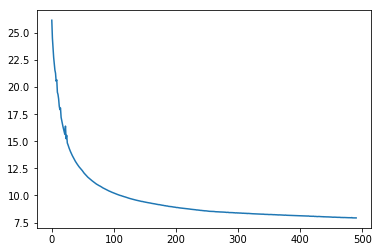

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [491] training...
  6%|▌         | 15/266 [00:00<00:01, 143.35it/s]

அருவி               	அல்லின்பரிதி        	அம்மாமருதம்         	அம்பொறையன்          
அம்பழம்             	அலைச்சுடர்க்கோன்    	அகன்பிச்சிட்டு      	அறவழுதிரு           
அங்குன்றக்குன்றம்மாவி	அரசத்தன்            	அவை                 	அகத்தவரசன்          
ஆல்                 	ஆற்றிமைவேந்தன்      	ஆயப்புலமை           	ஆல்லை               
ஆளஞ்டன்வயவல்        	ஆப்பகலோருவி         	ஆம்பற்பண்           	ஆகக்கதிர்           
ஆர்குசிட்குமரி      	ஆத்தரசன்            	ஆடல்வல்லி           	ஆற்செல்வரசன்        
இசைவல்லி            	இளங்கண்முத்தரசு     	இரும்பமுதம்         	இயல்வல்லோன்         
இளவழகிலி            	இய்ப                	இமுதன்முத்தம்       	இன்பரிதி            
இரன்மகள்            	இயல்வன்             	இன்பவல்லி           	இலம்பி              
ஈரியழகி             	ஈழத்தன்             	ஈகவளக்கழல்          	ஈழலர்கண்நாண்பன்     
ஈழச்செல்வம்         	ஈகரலவரசு            	ஈகைக்குன்றம்பு      	ஈகை                 
ஈகைக்குமடந்தை       	ஈச்                 	ஈண்சி               	ஈழமைக்கதிர் 

100%|██████████| 266/266 [00:02<00:00, 104.75it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [491] training loss:7.939949035644531
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [492] training...
100%|██████████| 266/266 [00:02<00:00, 88.95it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [492] training loss:7.923129081726074
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [493] training...
100%|██████████| 266/266 [00:02<00:00, 101.71it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [493] training loss:7.9204182624816895
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [494] training...
100%|██████████| 266/266 [00:02<00:00, 99.36it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [494] training loss:7.923331260681152
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [495] training...
100%|██████████| 266/266 [00:02<00:

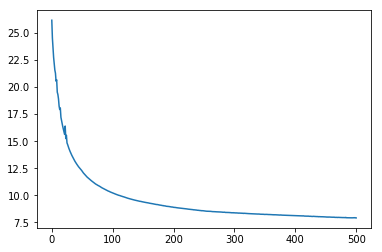

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [501] training...
  4%|▍         | 11/266 [00:00<00:02, 104.58it/s]

அதி                 	அணியறிஞன்           	அவைவல்லாள்          	அண்ணாமுத்தழகன்      
அன்பிச்சிட்டு       	அருங்கை             	அரற்சிட்டு          	அம்மைக்கோவன்        
அல்லியழகி           	அணிமாத்தம்பி        	அம்மை               	அருட்டு             
ஆயம்பல்லி           	ஆடலகண்முத்து        	ஆசைக்குமரி          	ஆரல்லோவையன்         
ஆர்வன்மறைமுத்து     	ஆர்வமுத்தம்பி       	ஆற்கயலன்மங்கை       	ஆன்மன்மன்னன்னன்     
ஆர்                 	ஆற்றற்செல்வலவன்     	ஆ                   	ஆற்றண்வளவறவவர்பன்   
இன்னினிழை           	இண்பண்பன்           	இளவயல்              	இளத்தலைத்துரை       
இரின்மைப்புன்பம்    	இளஞ்சியன்           	இயல்                	இன்னன்              
இருதல்விறல்         	இன்ன்ன்ன்ன்ன்       	இரசள்               	இன்வின்மகன்         
ஈகவல்லி             	ஈகப்பன்             	ஈழத்தமிழ்           	ஈழமுதல்லன்          
ஈகலிக்குயிற்செல்வம் 	ஈகைக்குமரன்         	ஈகயரசி              	ஈகை                 
ஈழச்சிச்சியரசி      	ஈகை                 	ஈழங்கல்விறலழகி      	ஈழத்தமிழரசு  

100%|██████████| 266/266 [00:02<00:00, 103.32it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [501] training loss:7.904240131378174
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [502] training...
100%|██████████| 266/266 [00:02<00:00, 83.71it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [502] training loss:7.9196600914001465
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [503] training...
100%|██████████| 266/266 [00:02<00:00, 105.78it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [503] training loss:7.913265228271484
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [504] training...
100%|██████████| 266/266 [00:02<00:00, 105.48it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [504] training loss:7.920351982116699
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [505] training...
100%|██████████| 266/266 [00:02<00:

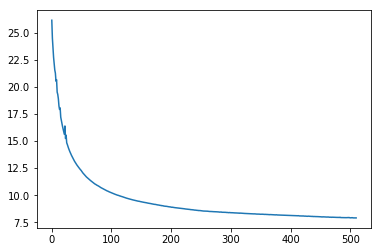

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [511] training...
  6%|▌         | 15/266 [00:00<00:01, 142.99it/s]

அகன்பன்றைவிறை       	அகத்தவளத்தன்        	அண்கன்பம்மை         	அஞ்சு               
அகவன்பம்            	அன்னினியன்          	அவையப்புலக்கனி      	அகரவன்              
அலைரணி              	அலை                 	அரசத்தி             	அன்ர்மாறன்          
ஆற்றற்செல்வம்பு     	ஆயற்சேய்            	ஆ                   	ஆற்றியறிஞன்         
ஆழிக்குறிஞ்சிமை     	ஆ                   	ஆயழகி               	ஆருட்மையவன்         
ஆலம்பழகு            	ஆட்டுயரசன்          	ஆழினிவிறல்          	ஆழ்த்திருவலன்       
இளம்பிறைவி          	இயல்வண்ணரசன்        	இயப்புன்னை          	இல்ல்               
இன்                 	இறைத்திண்ணன்        	இளங்கம்பு           	இன்                 
இதவளரரசி            	இ                   	இணர்தல்             	இன்குன்றை           
ஈகற்செம்மடந்தை      	ஈழக்குன்றன்         	ஈகச்சிலம்பு         	ஈம்                 
ஈகற்செம்மலர்        	ஈடல்                	ஈகக்கயம்            	ஈகைம்பல்கண்ணலவரன்   
ஈணைவில்             	ஈழமுதம்             	ஈழம்பன்றைவில்       	ஈகைக்குமரன்  

100%|██████████| 266/266 [00:02<00:00, 110.69it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [511] training loss:7.9073872566223145
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [512] training...
100%|██████████| 266/266 [00:02<00:00, 109.93it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [512] training loss:7.907313346862793
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [513] training...
100%|██████████| 266/266 [00:02<00:00, 110.49it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [513] training loss:7.8973283767700195
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [514] training...
100%|██████████| 266/266 [00:02<00:00, 111.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [514] training loss:7.8998823165893555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [515] training...
100%|██████████| 266/266 [00:02<0

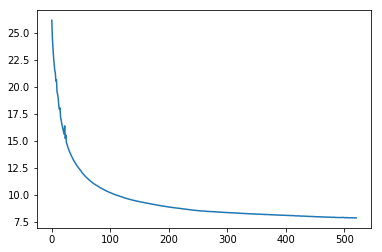

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [521] training...
  5%|▌         | 14/266 [00:00<00:01, 134.96it/s]

அரசி                	அன்ர்               	அகலம்மா             	அ                   
அடர்சின்மன்றைவல்லி  	அகனறி               	அங்கற்செல்வல்லாள்   	அணினியரசன்          
அருவளரரசி           	அ                   	அன்                 	அடன்மன்றைவழுதி      
ஆட்டக்குறிஞ்சியள்   	ஆர்வத்துத்தெத்தலைவழுதி	ஆட்சித்துத்திறல்    	ஆமையமுதன்           
ஆடலம்பண்            	ஆன்                 	ஆய்வப்புகழ்         	ஆன்றை               
ஆர்தல்வில்          	ஆற்றன்முத்தன்       	ஆடக்குமருதம்        	ஆட்சியன்            
இருல்வில்விளக்கு    	இல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்ல்வைமைச்சித்	இற்பக்கடல்          	இஞ்சப்பன்           
இ                   	இன்னெறிவளவரசன்      	இறையற்சிலம்பு       	இன்ர்வழுதிறலவன்     
இன்                 	இறைஞ்சாரல்லோன்      	இறைவமுதமுத்தம்மை    	இயலரசு              
ஈரியள்              	ஈன்                 	ஈகைக்கனி            	ஈகன்                
ஈகத்தித்தலைப்புனல்  	ஈகை                 	ஈகைத்தங்கை          	ஈகை                 
ஈழர்த்தங்கை         	ஈகைத்திறவழகன்       	ஈகை        

100%|██████████| 266/266 [00:02<00:00, 104.80it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [521] training loss:7.89984655380249
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [522] training...
100%|██████████| 266/266 [00:02<00:00, 111.42it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [522] training loss:7.8904805183410645
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [523] training...
100%|██████████| 266/266 [00:02<00:00, 110.40it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [523] training loss:7.8976030349731445
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [524] training...
100%|██████████| 266/266 [00:02<00:00, 109.78it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [524] training loss:7.891773700714111
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [525] training...
100%|██████████| 266/266 [00:02<00:

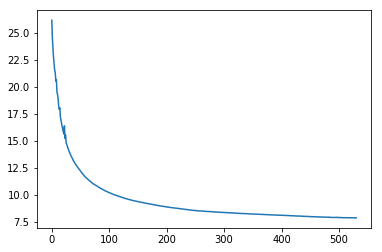

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [531] training...
  4%|▍         | 11/266 [00:00<00:02, 101.78it/s]

அருமைத்தலைவல்லி     	அஞ்சோழவன்           	அருதங்கள்           	அகரஞ்சி             
அகல்                	அவையறிவுவழுதி       	அணை                 	அருகன்              
அறவழகு              	அறதற்பொழிலன்        	அகன்பம்             	அடந்தில்            
ஆர்து               	ஆட்ண்பன்            	ஆடல்வல்             	ஆன்றை               
ஆற்செல்வக்கயம்      	ஆற்றின்             	ஆத்தினியணி          	ஆற்றற்கண்வக்கண்வளவவன்
ஆந்தலழகிளி          	ஆன்                 	ஆற்றண்க்குன்றைக்கயல்	ஆம்மைமைமைழுதிறவவவவவர்பன்
இத்து               	இர்                 	இன்பக்குன்றம்       	இருமல்லன்           
இளித்திருமலையள்     	இர்விண்ள்ள்ளநாடன்பன்	இறையற்செல்வம்பு     	இய்யவரசு            
இன்ன்               	இயற்பு              	இன்குமயிற்சென்செல்வத்தம்	இறைத்துணை           
ஈழக்கடல்            	ஈகழியன்             	ஈழச்சிச்செல்வம்     	ஈகழகம்பன்           
ஈகன்றை              	ஈழவண்ணலரசன்         	ஈகலமுதம்            	ஈகச்செளவழகன்        
ஈகன்மடந்தை          	ஈரிமலவன்            	ஈழக்கடல்            	ஈழத்

100%|██████████| 266/266 [00:02<00:00, 108.80it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [531] training loss:7.879883289337158
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [532] training...
100%|██████████| 266/266 [00:02<00:00, 106.77it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [532] training loss:7.8962178230285645
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [533] training...
100%|██████████| 266/266 [00:02<00:00, 104.85it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [533] training loss:7.88194465637207
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [534] training...
100%|██████████| 266/266 [00:02<00:00, 105.91it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [534] training loss:7.887436866760254
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [535] training...
100%|██████████| 266/266 [00:02<00:0

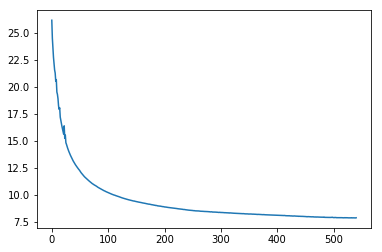

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [541] training...
  5%|▍         | 12/266 [00:00<00:02, 114.51it/s]

அம்மகளன்பம்         	அறக்குமறவன்         	அ                   	அணிமார்பன்          
அங்கம்பு            	அகத்தென்முறைதல்     	அகன்ன்ன்ன்ன்ன்ன்ன்  	அகரல்               
அன்புன்னை           	அலைமைத்திக்கோன்     	அடக்கண்ணல்          	அவைமை               
ஆக்கயற்சிலம்பு      	ஆர்கடலன்            	ஆழிக்கடல்           	ஆட்டுவைர்           
ஆலம்மா              	ஆட்கருத்தமிழன்      	ஆட்டுமலர்           	ஆற்றுமலையன்         
ஆற்றன்மடந்தை        	ஆருச்சுந்தனரசு      	ஆயட்டுக்கடல்        	ஆகர்க்குன்றக்குன்றக்குன்றைவண்ணன்
இன்                 	இயிச்செற்செல்வமுருகன்	இருவரஞ்சி           	இன்பரிதி            
இல்வக்குமடந்தை      	இருஞ்சாரல்          	இத்தியம்            	இலர்த்திறலன்        
இன்புக்குமரிதி      	இரியஞ்சான்          	இலங்கம்மை           	இற்றம்பி            
ஈகைப்புன்னை         	ஈகையறிவுமகன்        	ஈகற்குறிவக்குமடந்தைமகள்	ஈகற்செல்வன்         
ஈகைத்துத்துறைவல்லாள்	ஈழவக்கனனன்          	ஈள்வானம்            	ஈகைக்குன்றவன்       
ஈர்வியரி            	ஈகச்செல்வன்         	ஈஞ்சிலாஞ்சோழல்    

100%|██████████| 266/266 [00:02<00:00, 113.02it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [541] training loss:7.8704986572265625
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [542] training...
100%|██████████| 266/266 [00:02<00:00, 110.63it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [542] training loss:7.858115196228027
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [543] training...
100%|██████████| 266/266 [00:02<00:00, 116.62it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [543] training loss:7.876125335693359
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [544] training...
100%|██████████| 266/266 [00:02<00:00, 116.89it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [544] training loss:7.8668012619018555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [545] training...
100%|██████████| 266/266 [00:02<00

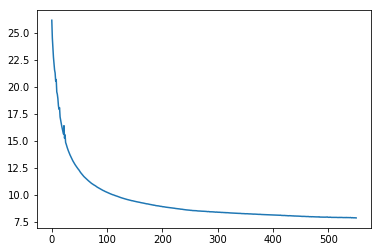

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [551] training...
  5%|▌         | 14/266 [00:00<00:01, 139.06it/s]

அறல்ன்மங்கை         	அணிகை               	அருதச்சிட்டு        	அலலவன்              
அலரின்பம்           	அம்மைக்குமரவலன்     	அவையமுதம்மை         	அகர்விரியறிவன்      
அகல்                	அணி                 	அமின்றன்மடந்தை      	அரியண்ணல்           
ஆண்மடந்தை           	ஆடலரசன்             	ஆசைக்குன்றம்        	ஆர்குண்ணற்கண்ணு     
ஆர்ந்தைவிற்கயல்     	ஆ                   	ஆழித்தமிழ்          	ஆற்கைன்மன்னன்       
ஆ                   	ஆற்றண்முத்து        	ஆர்சிவிலைவில்       	ஆல்                 
இருனினியணி          	இரும்பருட்டு        	இன்புக்குன்றைவல்லாள்	இன்றலன்             
இளந்தங்கம்பு        	இர்ம்பரிதி          	இசைக்குறினியலைமதி   	இல்லலவரசு           
இகையமுதம்மை         	இடற்செல்வரசு        	இந்தலழகி            	இன்னச்செல்வன்       
ஈரிவியட்சியரி       	ஈழக்கதிர்           	ஈகைக்குன்றச்செல்வி  	ஈடலழகன்             
ஈழதவரண்ணி           	ஈகைம்புன்னை         	ஈகைச்சி             	ஈகவரசன்             
ஈகைக்கு             	ஈழச்சுடரோன்         	ஈகைம்புணை           	ஈகைம்பன்     

100%|██████████| 266/266 [00:02<00:00, 113.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [551] training loss:7.856216907501221
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [552] training...
100%|██████████| 266/266 [00:02<00:00, 114.93it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [552] training loss:7.857273101806641
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [553] training...
100%|██████████| 266/266 [00:02<00:00, 108.09it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [553] training loss:7.851474761962891
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [554] training...
100%|██████████| 266/266 [00:02<00:00, 111.94it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [554] training loss:7.858984470367432
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [555] training...
100%|██████████| 266/266 [00:02<00:0

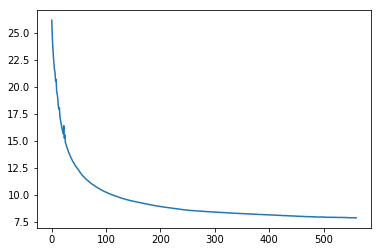

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [561] training...
  6%|▌         | 15/266 [00:00<00:01, 146.65it/s]

அகரத்தமிழ்          	அர்                 	அடலரசி              	அறதகன்செழுந்தேறவளவரசு
அம்மாவில்           	அன்                 	அ                   	அன்                 
அறங்கம்மை           	அடந்தல்லோன்         	அன்டன்ச்சிக்குன்றம் 	அன்புத்தமிழ்        
ஆழிச்செயற்செல்வல்லாள்	ஆரி                 	ஆரல்லித்தங்கை       	ஆற்செத்தெத்தெத்தெத்தெத்தற்செழியரசன்
ஆர்குன்றம்பண்       	ஆன்கன்              	ஆக்குறிஞ்சிமங்கை    	ஆற்றை               
ஆ                   	ஆம்பல்லோன்          	ஆ                   	ஆர்விவிழியன்        
இவரஞ்சி             	இன்பரியன்           	இரியம்மை            	இயற்கண்ணலவன்        
இய்கை               	இத்தகலிவலவன்        	இளக்குமடந்தையள்     	இளஞ்செல்வள்ளல்      
இனிமுகை             	இ                   	இத்தப்பிலழகி        	இளந்தனம்            
ஈழமருதம்மா          	ஈகை                 	ஈழத்தியம்மை         	ஈழந்தனின்பு         
ஈடச்செல்வம்         	ஈண்கண்ணாண்ணாண்பண்ணன்	ஈடம்புமுதம்மாள்     	ஈழந்தைமுத்தழகன்     
ஈகைப்புகழல்         	ஈகைக்குமரன்         	ஈறிமைக்குறிஞ்சிலி

100%|██████████| 266/266 [00:02<00:00, 109.30it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [561] training loss:7.840390682220459
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [562] training...
100%|██████████| 266/266 [00:02<00:00, 108.67it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [562] training loss:7.83793306350708
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [563] training...
100%|██████████| 266/266 [00:02<00:00, 105.31it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [563] training loss:7.829654216766357
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [564] training...
100%|██████████| 266/266 [00:02<00:00, 103.41it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [564] training loss:7.842806339263916
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [565] training...
100%|██████████| 266/266 [00:02<00:00

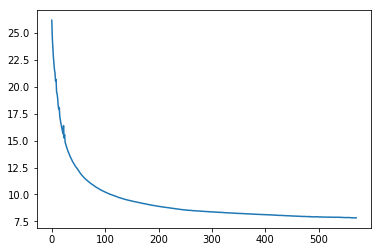

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [571] training...
  6%|▌         | 15/266 [00:00<00:01, 141.95it/s]

அம்                 	அரிமுகில்           	அரினியம்மை          	அவை                 
அல்வை               	அகந்ந்துகலக்கோமான்  	அங்கனிலவு           	அன்பன்              
அ                   	அங்கண்முருகு        	அறவரசி              	அருளத்தன்           
ஆக்கடலரசி           	ஆண்மைக்கண்ணர்வழுதி  	ஆம்பண்ணி            	ஆய்வம்பி            
ஆய்யக்குயில்        	ஆடல்வந்தன்          	ஆ                   	ஆற்றியமுத்தன்       
ஆற்றலரச             	ஆசையறிஞன்           	ஆணிமலையழகி          	ஆற்றற்கடல்வன்       
இசைச்சுடன்மறை       	இ                   	இத்துக்குன்றம்மாரி  	இளங்கண்ணன்          
இங்கண்மல்           	இளவளவரசன்           	இருஞ்செல்வம்பு      	இஞ்சன்பரிதி         
இலங்கலம்            	இளந்ச்சுந்தகன்மகலன் 	இரிழை               	இருங்கண்ணன்         
ஈகைக்குறின்முகைக்கயல்	ஈழக்கதிர்           	ஈடச்சுடன்மடந்தை     	ஈகை                 
ஈம்புன்மடந்தை       	ஈகழிலன்             	ஈகைம்பழக்குன்றம்மலர்	ஈழச்செழியரசன்       
ஈழத்தலை             	ஈகைமைந்தன்          	ஈழங்கமுதம்மை        	ஈகை         

100%|██████████| 266/266 [00:02<00:00, 83.67it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [571] training loss:7.826783657073975
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [572] training...
100%|██████████| 266/266 [00:02<00:00, 113.71it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [572] training loss:7.833031177520752
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [573] training...
100%|██████████| 266/266 [00:02<00:00, 104.61it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [573] training loss:7.8240861892700195
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [574] training...
100%|██████████| 266/266 [00:02<00:00, 104.74it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [574] training loss:7.820072650909424
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [575] training...
100%|██████████| 266/266 [00:02<00:

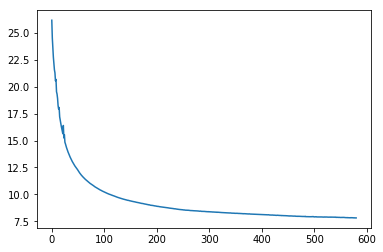

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [581] training...
  6%|▌         | 15/266 [00:00<00:01, 141.00it/s]

அ                   	அந்தனவரசு           	அருவிறலி            	அகன்பு              
அருளப்புகழ்         	அகவன்               	அவைத்திரு           	அம்                 
அங்கலம்மை           	அவைமுடிவேந்தன்      	அருதம்              	அமையரசு             
ஆர்வளரரசு           	ஆஞ்சறிஞன்           	ஆ                   	ஆழித்தவரசன்         
ஆய்ம்மை             	ஆல்                 	ஆளியம்மை            	ஆம்பண்ணல்           
ஆய்ங்குமன்றம்பழம்   	ஆல்                 	ஆல்லையற்பண்         	ஆள்                 
இசை                 	இலக்கிழான்          	இணத்தலைமணி          	இன்பக்கடன்          
இளவிழியள்           	இன்கன்ற்ன்மருதன்    	இ                   	இன்றைன்றைன்றைன்றைன்றைன்றைன்றைன்றைன்றைன்றை
இருகுமலையழகி        	இ                   	இசைக்கற்செற்செல்வளக்கிளி	இன்னின்             
ஈகவல்வி             	ஈழமைமைந்தன்         	ஈழத்தமிழ்           	ஈழக்கதிர்           
ஈகன்வளரரசி          	ஈகவந்தன்            	ஈடற்கற்செற்செல்வல்லி	ஈகைன்புன்பன்        
ஈகப்புத்திறல்       	ஈகை                 	ஈழவன்    

100%|██████████| 266/266 [00:02<00:00, 108.77it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [581] training loss:7.837770938873291
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [582] training...
100%|██████████| 266/266 [00:02<00:00, 107.55it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [582] training loss:7.806684494018555
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [583] training...
100%|██████████| 266/266 [00:02<00:00, 105.91it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [583] training loss:7.804932594299316
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [584] training...
100%|██████████| 266/266 [00:02<00:00, 114.21it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [584] training loss:7.8154377937316895
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [585] training...
100%|██████████| 266/266 [00:02<00:

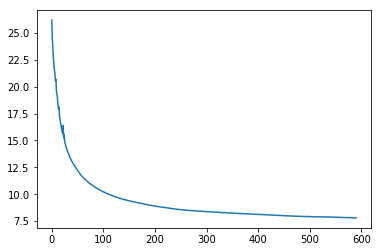

INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [591] training...
  6%|▌         | 15/266 [00:00<00:01, 146.44it/s]

அல்வைமை             	அரன்மன்னன்          	அல்வி               	அடந்தைக்கண்ணற்கண்ணன்
அல்லியழகி           	அன்ன்முடிவன்பன்     	அலரின்பம்மை         	அணி                 
அறந்தன்             	அண்ணமுடிவேங்கை      	அகத்தத்தலைவல்லி     	அன்                 
ஆக்டறிக்குன்றம்மா   	ஆற்றியவர்பகரவன்     	ஆர்மைம்மணி          	ஆர்மைந்தன்          
ஆண்                 	ஆய்                 	ஆயலையழகி            	ஆ                   
ஆற்றன்வளரரசி        	ஆங்ங்கமுமுறையறிவு   	ஆர்பகலம்மா          	ஆர்                 
இயற்புகழல்          	இன்பரிதி            	இனங்கம்பு           	இனல்வை              
இளசடரசல்            	இன்பன்              	இயினிக்கடல்         	இரத்திக்கோவன்       
இ                   	இன்னமைக்குன்றன்னி   	இணவளரரசி            	இன்பப்பொழில்        
ஈழந்தண்             	ஈகழியற்செம்மலன்     	ஈழச்செல்வல்லி       	ஈழவத்துத்தமிழன்     
ஈகைக்குறிஞ்சி       	ஈங்கைத்தம்பி        	ஈகை                 	ஈழவன்               
ஈகையழகி             	ஈகை                 	ஈழமுதமடந்தை         	ஈச்சென்னன்   

100%|██████████| 266/266 [00:02<00:00, 106.47it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [591] training loss:7.796041488647461
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [592] training...
100%|██████████| 266/266 [00:02<00:00, 103.81it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [592] training loss:7.803011417388916
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [593] training...
100%|██████████| 266/266 [00:02<00:00, 107.89it/s]
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [593] training loss:7.798973083496094
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [594] training...
100%|██████████| 266/266 [00:02<00:00, 86.53it/s] 
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [594] training loss:7.7987446784973145
INFO    :<ipython-input-72-e4d59019704c>.            <module> >>   [595] training...
100%|██████████| 266/266 [00:02<00:

In [72]:
time += 1
names_dump = open('names_dump_{}'.format(time), 'w')
for epoch in range(600):
    gen.cuda()
    log.info('[{}] training...'.format(epoch))

    for i in _tqdm(range(len(trainset)//batch_size)):
        #log.debug('  ==== batch {}'.format(i))
        samples = trainset[batch_size * i:batch_size * (i+1)]
        if not samples:
            continue
        samples = batch_op(samples)
        op.zero_grad()
        loss = 0
        hidden = gen.init_hidden(batch_size).cuda()

        #log.debug('\n  == samples {}'.format(pformat(samples)))
        for j in range(len(samples[0]) - 1):
            #log.debug('  index-j:{}'.format(j))
            #log.debug('  len(samples[0])-1: {}'.format(len(samples[0]) - 1))            
            cat = [sample[j][0] for sample in samples]
            char = [sample[j][1] for sample in samples]
            target = [sample[j+1][1] for sample in samples]
            
            cat = torch.LongTensor(cat).cuda()
            char = torch.LongTensor(char).cuda()
            target = torch.LongTensor(target).cuda()
            
            #log.debug('\ncat: {}\n char: {}, \ntarget: {}'.format(cat, char, target))

            
            if rand.choice([0, 1]):
                random = gen.randomize(hidden.size()[0]).cuda()
            else:
                random = Variable(torch.randn(hidden.size()[0], gen.randomize_size)).cuda()
            
            cat, char, target = Variable(cat), Variable(char), Variable(target)
            hidden, output = gen(cat, char, hidden, random)
            
            loss += crit(output, target)
        

        loss.backward()
        op.step()
    train_losses.append(loss.data[0])
    log.info('[{}] training loss:{}'.format(epoch, loss.data[0]))
    if epoch % print_every == 0:
        """
        log.info('outputs and targets: {}'.format(pformat(
                [i for i in zip(output.data.max(1)[1].cpu().numpy(), 
                    target.data.cpu().numpy())]
                   )))
        """
        log.info('[{}] evaluating...'.format(epoch))
        losses = []
        correct = 0
        #log.debug('  ==== batch {}'.format(i))
        for i in range(len(testset)//batch_size):
            samples = testset[batch_size * i:batch_size * (i+1)]
            if not samples:
                continue
            samples = batch_op(samples)
            op.zero_grad()
            hidden = gen.init_hidden(batch_size).cuda()
            loss = 0
            #log.debug('\n  == samples {}'.format(pformat(samples)))
            for j in range(len(samples[0]) - 1):
                #log.debug('  index-j:{}'.format(j))
                #log.debug('  len(samples[0])-1: {}'.format(len(samples[0]) - 1))            
                log.setLevel(logging.INFO)
                cat = [sample[j][0] for sample in samples]
                char = [sample[j][1] for sample in samples]
                target = [sample[j+1][1] for sample in samples]

                cat = torch.LongTensor(cat).cuda()
                char = torch.LongTensor(char).cuda()
                target = torch.LongTensor(target).cuda()

                #log.debug('\ncat: {}\n char: {}, \ntarget: {}'.format(cat, char, target))

                hidden = gen.init_hidden(batch_size).cuda()

                if rand.choice([0, 1]):
                    random = gen.randomize(hidden.size()[0]).cuda()
                else:
                    random = Variable(torch.randn(hidden.size()[0], gen.randomize_size)).cuda()

                cat, char, target = Variable(cat), Variable(char), Variable(target)
                hidden, output = gen(cat, char, hidden, random)
                loss += crit(output, target)
                if output.data.max(1)[1].cpu().numpy()[0] == target.data[0]:
                    correct += 1
            losses.append(loss.data[0])
        if len(losses):
            log.info('[{}] loss: {}; accuracy:{}'.format(epoch, sum(losses)/len(losses), correct/len(testset)))
        plt.plot(train_losses)
        plt.show()
        
        gen.cpu()        
        a = samples_from_letters('girl')
        b = samples_from_letters('boy')
        c = samples_from_letters('girl', randomize=True)
        d = samples_from_letters('boy', randomize=True)
        for i in zip(a,b,c,d):
            print('{:20s}\t{:20s}\t{:20s}\t{:20s}'.format(i[0], i[1], i[2], i[3]))
            names_dump.write('{}\t{:20s}\t{:20s}\t{:20s}\t{:20s}\n'.format(epoch, i[0], i[1], i[2], i[3]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses)

In [27]:
max_length = 20

# Sample from a category and starting letter
def Sample(category, start_letter='A'):
    category_tensor = Variable(torch.LongTensor([categories.index(category)]))
    input = Variable(torch.LongTensor([letters.index(start_letter)]))
    hidden = Variable(torch.randn(1, gen.hidden_size))

    output_name = [start_letter]

    for i in range(max_length):
        hidden, output = gen(category_tensor, input, hidden, Variable(torch.randn(1, gen.randomize_size)))
        topv, topi = output.data.topk(1)
        topi = topi[0][0]
        if topi == len(letters) - 1:
            break
        else:
            letter = letters[topi]
            output_name.append(letter)
        input = Variable(torch.LongTensor([letters.index(letter)]))

    return output_name

# Get multiple samples from one category and multiple starting letters
def Samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        s = Sample(category, tace16.utf8_to_tace16(start_letter)[0])
        s = [i for i in s if i not in ['PAD', 'EOS']]
        print(bytes(tace16.tace16_to_utf8(s)).decode())

In [28]:
gen.cpu()
for i in ['அ', 'ஆ', 'க', 'ப', 'எ', 'அ', 'ஆ', 'க', 'ப', 'எ']:
    Samples('boy', i)

அன்
ஆன்
க
பன்
எ
அன்
ஆன்
கன்
ப
எ


In [36]:
max_length = 20

# Sample from a category and starting letter
def sample_from_letter(category, start_letter, randomize=False):
    category_tensor = Variable(torch.LongTensor([categories.index(category)]))
    input = Variable(torch.LongTensor([letters.index(start_letter)]))
    hidden = Variable(torch.randn(1, gen.hidden_size)) 

    output_name = [start_letter]
    for i in range(max_length):
        if randomize:
            random = gen.randomize(hidden.size()[0])
        else:
            random = Variable(torch.zeros(hidden.size()[0], gen.randomize_size)) 
        hidden, output = gen(category_tensor, input, hidden, random)
        topv, topi = output.data.topk(1)
        topi = topi[0][0]
        if topi == len(letters) - 1:
            break
        else:
            letter = letters[topi]
            output_name.append(letter)
        input = Variable(torch.LongTensor([letters.index(letter)]))

    return output_name

def samples_from_letters(category, start_letters=letters[1:], randomize=False):
    names = []
    for start_letter in start_letters:
        if start_letter in ['PAD', ' ', 'EOS']:
            continue
        for t in range(3):
            s = sample_from_letter(category, start_letter, randomize)
            s = [i for i in s if i not in ['PAD', 'EOS']]
            names.append(bytes(tace16.tace16_to_utf8(s)).decode())
        
    return names

In [37]:
gen.cpu()
samples_from_letters('girl')
samples_from_letters('boy')

['அகன்',
 'அகன்',
 'அகன்',
 'ஆகன்',
 'ஆன்',
 'ஆகன்',
 'இன்',
 'இன்',
 'இன்',
 'ஈன்',
 'ஈன்',
 'ஈன்',
 'உ',
 'உ',
 'உ',
 'ஊ',
 'ஊ',
 'ஊ',
 'என்',
 'என்',
 'என்',
 'ஏன்',
 'ஏகன்',
 'ஏன்',
 'ஐன்',
 'ஐன்',
 'ஐன்',
 'ஒல்',
 'ஒன்',
 'ஒன்',
 'ஓன்',
 'ஓன்',
 'ஓன்',
 'ஃகன்',
 'ஃகன்',
 'ஃகன்',
 'க்கன்',
 'க்கன்',
 'க்கன்',
 'கன்',
 'கன்',
 'கன்',
 'கா',
 'கா',
 'கா',
 'கின்',
 'கின்',
 'கின்',
 'கீ',
 'கீ',
 'கீ',
 'குன்',
 'குன்',
 'குன்',
 'கூன்',
 'கூன்',
 'கூன்',
 'கெகன்',
 'கெகன்',
 'கெகன்',
 'கேவன்',
 'கே',
 'கேவன்',
 'கை',
 'கை',
 'கை',
 'கொன்',
 'கொன்',
 'கொன்',
 'கோ',
 'கோ',
 'கோவன்',
 'ங்கன்',
 'ங்கன்',
 'ங்கன்',
 'ஙகன்',
 'ஙகன்',
 'ஙகன்',
 'ச்ன்',
 'ச்ன்',
 'ச்ன்',
 'சன்',
 'சன்',
 'சன்',
 'சான்',
 'சான்',
 'சான்',
 'சிவன்',
 'சி',
 'சிவன்',
 'சீன்',
 'சீன்',
 'சீன்',
 'சு',
 'சு',
 'சு',
 'சூன்',
 'சூன்',
 'சூன்',
 'சென்',
 'சென்',
 'சென்',
 'சேன்',
 'சேன்',
 'சேன்',
 'சைன்',
 'சைன்',
 'சைன்',
 'சொயன்',
 'சொ',
 'சொ',
 'சோன்',
 'சோன்',
 'சோன்',
 'ஞ்ன்',
 'ஞ்ன்',
 'ஞ்ன்',
 'ஞன்',
 'ஞன்

In [ ]:
model_instance = 5

In [ ]:
model_instance += 1
torch.save(gen.state_dict(), 'tamil-name-tace16-{}.pth'.format(model_instance))

In [33]:
letters

['PAD',
 ' ',
 57857,
 57858,
 57859,
 57860,
 57861,
 57862,
 57863,
 57864,
 57865,
 57866,
 57867,
 57869,
 57872,
 57873,
 57874,
 57875,
 57876,
 57877,
 57878,
 57879,
 57880,
 57881,
 57882,
 57883,
 57888,
 57889,
 57904,
 57905,
 57906,
 57907,
 57908,
 57909,
 57910,
 57911,
 57912,
 57913,
 57914,
 57915,
 57920,
 57921,
 57922,
 57929,
 57936,
 57937,
 57938,
 57939,
 57941,
 57942,
 57943,
 57944,
 57945,
 57946,
 57947,
 57952,
 57953,
 57954,
 57955,
 57956,
 57957,
 57958,
 57959,
 57960,
 57961,
 57962,
 57963,
 57968,
 57969,
 57970,
 57971,
 57972,
 57973,
 57974,
 57975,
 57976,
 57977,
 57978,
 57979,
 57980,
 57984,
 57985,
 57986,
 57987,
 57988,
 57989,
 57991,
 57992,
 57993,
 57994,
 58000,
 58001,
 58002,
 58003,
 58004,
 58005,
 58006,
 58007,
 58008,
 58009,
 58010,
 58011,
 58016,
 58017,
 58018,
 58019,
 58020,
 58021,
 58022,
 58023,
 58024,
 58025,
 58026,
 58027,
 58028,
 58032,
 58033,
 58034,
 58035,
 58036,
 58037,
 58038,
 58039,
 58040,
 58041,
 5

In [ ]:
[x for x in gen.inp_embedding.parameters()]